In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
# Reading telecom churn dataset:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
def null_values(df_null, cutoff): 
    df_col_miss_val = pd.DataFrame(round(((df_null.isnull().sum()/len(df_null.index))*100),2).sort_values(ascending = False))
    df_col_miss_val.reset_index(level = 0, inplace=True)
    df_col_miss_val.columns = ["ColName", "%age"]
    df_col_del = df_col_miss_val[df_col_miss_val["%age"] > cutoff]
    df_col_del.reset_index(drop = True, inplace = True)  
    return df_col_del

### Missing Values

In [7]:
df_col_del = null_values(df, 70)
df_col_del

ColName   %age
0                  arpu_3g_6  74.85
1           night_pck_user_6  74.85
2          total_rech_data_6  74.85
3                  arpu_2g_6  74.85
4            max_rech_data_6  74.85
5                  fb_user_6  74.85
6         av_rech_amt_data_6  74.85
7   date_of_last_rech_data_6  74.85
8            count_rech_2g_6  74.85
9            count_rech_3g_6  74.85
10  date_of_last_rech_data_7  74.43
11         total_rech_data_7  74.43
12                 fb_user_7  74.43
13           max_rech_data_7  74.43
14          night_pck_user_7  74.43
15           count_rech_2g_7  74.43
16        av_rech_amt_data_7  74.43
17                 arpu_2g_7  74.43
18           count_rech_3g_7  74.43
19                 arpu_3g_7  74.43
20         total_rech_data_9  74.08
21           count_rech_3g_9  74.08
22                 fb_user_9  74.08
23           max_rech_data_9  74.08
24                 arpu_3g_9  74.08
25  date_of_last_rech_data_9  74.08
26          night_pck_user_9  74.08
27                 arpu_2g_9  74.08
28           count_rech_2g_9  74.08
29        av_rech_amt_data_9  74.08
30         total_rech_data_8  73.66
31                 arpu_3g_8  73.66
32                 fb_user_8  73.66
33          night_pck_user_8  73.66
34        av_rech_amt_data_8  73.66
35           max_rech_data_8  73.66
36           count_rech_3g_8  73.66
37                 arpu_2g_8  73.66
38           count_rech_2g_8  73.66
39  date_of_last_rech_data_8  73.66

### Handling recharge columns:

In [8]:
df_col_rech = [col for col in df_col_del if "rech" in col]
df_col_rech

[]

In [9]:
# Finding meaningful missing and actual missing values. If recharge date and value are missing for a customer then
# it implies that the customer has not done any recharge. Such cases are meaningful missing and can be replaced with zeros.

condition_6 = [ (df.total_rech_data_6.isnull()) & (df.date_of_last_rech_data_6.isnull()) ]
condition_7 = [ (df.total_rech_data_7.isnull()) & (df.date_of_last_rech_data_7.isnull()) ]
condition_8 = [ (df.total_rech_data_8.isnull()) & (df.date_of_last_rech_data_8.isnull()) ]
condition_9 = [ (df.total_rech_data_9.isnull()) & (df.date_of_last_rech_data_9.isnull()) ]

values = [0]

df.total_rech_data_6 = np.select(condition_6, values)
df.total_rech_data_7 = np.select(condition_7, values)
df.total_rech_data_8 = np.select(condition_8, values)
df.total_rech_data_9 = np.select(condition_9, values)

#### Following columns indicate the services that customer has subscribed to:
count_rech_3g_6

count_rech_3g_7

count_rech_3g_8

count_rech_3g_9

count_rech_2g_6

count_rech_2g_7

count_rech_2g_8

count_rech_2g_9

If for above columns values are missing then it means customer is not using those services and we can impute such records with zero.

In [10]:
df.count_rech_2g_6.fillna(0, inplace = True)
df.count_rech_2g_7.fillna(0, inplace = True)
df.count_rech_2g_8.fillna(0, inplace = True)
df.count_rech_2g_9.fillna(0, inplace = True)

df.count_rech_3g_6.fillna(0, inplace = True)
df.count_rech_3g_7.fillna(0, inplace = True)
df.count_rech_3g_8.fillna(0, inplace = True)
df.count_rech_3g_9.fillna(0, inplace = True)
 

Following columns indicate the average values of reacharge. If the customer has not recharged then the average values should also be imputed with zero.

av_rech_amt_data_6 

av_rech_amt_data_7 

av_rech_amt_data_8 

av_rech_amt_data_9


In [11]:
df.av_rech_amt_data_6.fillna(0, inplace = True)
df.av_rech_amt_data_7.fillna(0, inplace = True)
df.av_rech_amt_data_8.fillna(0, inplace = True)
df.av_rech_amt_data_9.fillna(0, inplace = True)

#### Following columns are of no use now and cannot be imputed by making it zero or using mean/median/mode.
date_of_last_rech_data_6

date_of_last_rech_data_7

date_of_last_rech_data_8

date_of_last_rech_data_9


date_of_last_rech_6

date_of_last_rech_7

date_of_last_rech_8

date_of_last_rech_9


last_date_of_month_6

last_date_of_month_7

last_date_of_month_8

last_date_of_month_9


Hence, we will just drop these columns.

In [12]:
df.drop(["date_of_last_rech_data_6"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_data_7"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_data_8"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_data_9"], axis = 1, inplace = True)

df.drop(["date_of_last_rech_6"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_7"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_8"], axis = 1, inplace = True)
df.drop(["date_of_last_rech_9"], axis = 1, inplace = True)

df.drop(["last_date_of_month_6"], axis = 1, inplace = True)
df.drop(["last_date_of_month_7"], axis = 1, inplace = True)
df.drop(["last_date_of_month_8"], axis = 1, inplace = True)
df.drop(["last_date_of_month_9"], axis = 1, inplace = True)


In [13]:
df.shape

(99999, 214)

#### For following columns, missing values should be replaced with "-1".
night_pck_user_6

night_pck_user_7

night_pck_user_8

night_pck_user_9

fb_user_6

fb_user_7

fb_user_8

fb_user_9 

In [14]:
df.night_pck_user_6.fillna(-1, inplace = True)
df.night_pck_user_7.fillna(-1, inplace = True)
df.night_pck_user_8.fillna(-1, inplace = True)
df.night_pck_user_9.fillna(-1, inplace = True)

df.fb_user_6.fillna(-1, inplace = True)
df.fb_user_7.fillna(-1, inplace = True)
df.fb_user_8.fillna(-1, inplace = True)
df.fb_user_9.fillna(-1, inplace = True)

In [15]:
df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9"]].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
count     25153.000000     25571.000000     26339.000000      25922.00000
mean        126.393392       126.729459       125.717301        124.94144
std         108.477235       109.765267       109.437851        111.36376
min           1.000000         1.000000         1.000000          1.00000
25%          25.000000        25.000000        25.000000         25.00000
50%         145.000000       145.000000       145.000000        145.00000
75%         177.000000       177.000000       179.000000        179.00000
max        1555.000000      1555.000000      1555.000000       1555.00000

In [16]:
# Minimum value is 1 and maximum value is 1555. If the value for this is missing it means no recharge has 
# been done in that month by the customer.

df.max_rech_data_6.fillna(0, inplace = True)
df.max_rech_data_7.fillna(0, inplace = True)
df.max_rech_data_8.fillna(0, inplace = True)
df.max_rech_data_9.fillna(0, inplace = True)

In [17]:
df_col_del = null_values(df, 40)
df_col_del

ColName   %age
0  arpu_3g_6  74.85
1  arpu_2g_6  74.85
2  arpu_3g_7  74.43
3  arpu_2g_7  74.43
4  arpu_3g_9  74.08
5  arpu_2g_9  74.08
6  arpu_3g_8  73.66
7  arpu_2g_8  73.66

In [18]:
# Getting list of columns that are to be deleted as there are more than 40% null values:

df_col_del_list = list(df_col_del["ColName"])
df_col_del_list

['arpu_3g_6',
 'arpu_2g_6',
 'arpu_3g_7',
 'arpu_2g_7',
 'arpu_3g_9',
 'arpu_2g_9',
 'arpu_3g_8',
 'arpu_2g_8']

In [19]:
# Dropping the columns:

df_1 = df.drop(df_col_del_list, axis = 1)
df_1

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  \
0                 0.0  197.385  214.816  213.803   21.100          NaN  ...   
1                 0.0   34.047  355.074  268.321   86.285        24.11  ...   
2                 0.0  167.690  189.058  210.226  290.714        11.54  ...   
3                 0.0  221.338  251.102  508.054  389.500        99.91  ...   
4                 0.0  261.636  309.876  238.174  163.426        50.31  ...   
...               ...      ...      ...      ...      ...          ...  ...   
99994             0.0   18.471   69.161   57.530   29.950         5.40  ...   
99995             0.0  112.201   77.811   79.081  140.835        29.26  ...   
99996             0.0  229.187    0.000    0.000    0.000         1.11  ...   
99997             0.0  322.991  303.386  606.817  731.010         0.00  ...   
99998             0.0  687.065    0.000    0.000    0.000        84.34  ...   

       sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
0                0        1.0        1.0        1.0       -1.0   968   
1                0       -1.0        1.0        1.0       -1.0  1006   
2                0       -1.0       -1.0       -1.0        1.0  1103   
3                0       -1.0       -1.0       -1.0       -1.0  2491   
4                0        0.0       -1.0       -1.0       -1.0  1526   
...            ...        ...        ...        ...        ...   ...   
99994            0       -1.0       -1.0       -1.0       -1.0  3199   
99995            0       -1.0       -1.0       -1.0       -1.0  2052   
99996            0        1.0       -1.0       -1.0       -1.0   185   
99997            0        1.0        1.0        1.0        1.0   478   
99998            0        1.0       -1.0       -1.0       -1.0   751   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0           30.40        0.00      101.20        3.58  
1            0.00        0.00        0.00        0.00  
2            0.00        0.00        4.17        0.00  
3            0.00        0.00        0.00        0.00  
4            0.00        0.00        0.00        0.00  
...           ...         ...         ...         ...  
99994        0.00        0.00        0.00        0.00  
99995        0.00        0.00        0.00        0.00  
99996        0.00        0.00        0.00        0.00  
99997     1445.74     1151.03     1173.18        0.00  
99998        0.00        0.00        0.00        0.00  

[99999 rows x 206 columns]

In [20]:
df_1.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  99999.000000  99999.000000   
mean     132.395875  ...      0.084581     -0.518465     -0.511905   
std      297.207406  ...      0.650457      0.842420      0.845358   
min        0.000000  ...      0.000000     -1.000000     -1.000000   
25%        7.380000  ...      0.000000     -1.000000     -1.000000   
50%       34.310000  ...      0.000000     -1.000000     -1.000000   
75%      118.740000  ...      0.000000      0.000000      0.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      -0.501975     -0.517595   1219.854749     68.170248     66.839062   
std        0.848097      0.834303    954.733842    267.580450    271.201856   
min       -1.000000     -1.000000    180.000000      0.000000      0.000000   
25%       -1.000000     -1.000000    467.000000      0.000000      0.000000   
50%       -1.000000     -1.000000    863.000000      0.000000      0.000000   
75%        0.000000      0.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 206 columns]

In [21]:
df_col_del = null_values(df_1, 40)
df_col_del

Empty DataFrame
Columns: [ColName, %age]
Index: []

In [22]:
df_1.shape

(99999, 206)

In [23]:
df_col_del = null_values(df_1, 5)
df_col_del


ColName  %age
0       spl_og_mou_9  7.75
1   loc_og_t2t_mou_9  7.75
2   std_og_t2f_mou_9  7.75
3       loc_ic_mou_9  7.75
4   loc_ic_t2m_mou_9  7.75
5      roam_og_mou_9  7.75
6   std_ic_t2f_mou_9  7.75
7   std_og_t2m_mou_9  7.75
8   std_ic_t2m_mou_9  7.75
9   loc_ic_t2t_mou_9  7.75
10  std_og_t2t_mou_9  7.75
11  loc_og_t2m_mou_9  7.75
12  std_ic_t2t_mou_9  7.75
13  loc_ic_t2f_mou_9  7.75
14  loc_og_t2f_mou_9  7.75
15      loc_og_mou_9  7.75
16  std_ic_t2o_mou_9  7.75
17     roam_ic_mou_9  7.75
18      offnet_mou_9  7.75
19       og_others_9  7.75
20       ic_others_9  7.75
21      isd_og_mou_9  7.75
22      isd_ic_mou_9  7.75
23      std_og_mou_9  7.75
24      spl_ic_mou_9  7.75
25  loc_og_t2c_mou_9  7.75
26       onnet_mou_9  7.75
27      std_ic_mou_9  7.75
28  std_og_t2c_mou_9  7.75
29  loc_ic_t2t_mou_8  5.38
30  std_og_t2m_mou_8  5.38
31      std_og_mou_8  5.38
32  std_og_t2c_mou_8  5.38
33       og_others_8  5.38
34  std_og_t2t_mou_8  5.38
35  loc_ic_t2m_mou_8  5.38
36      isd_og_mou_8  5.38
37  std_og_t2f_mou_8  5.38
38      loc_og_mou_8  5.38
39      loc_ic_mou_8  5.38
40  loc_ic_t2f_mou_8  5.38
41  std_ic_t2m_mou_8  5.38
42  loc_og_t2c_mou_8  5.38
43  std_ic_t2f_mou_8  5.38
44       ic_others_8  5.38
45      isd_ic_mou_8  5.38
46      spl_ic_mou_8  5.38
47       onnet_mou_8  5.38
48      std_ic_mou_8  5.38
49      offnet_mou_8  5.38
50  std_ic_t2o_mou_8  5.38
51     roam_og_mou_8  5.38
52     roam_ic_mou_8  5.38
53  loc_og_t2t_mou_8  5.38
54  loc_og_t2m_mou_8  5.38
55  std_ic_t2t_mou_8  5.38
56      spl_og_mou_8  5.38
57  loc_og_t2f_mou_8  5.38

In [24]:
# For all the above columns, these are the services that client may or may not opt to use. MOU here stands for minues ot use.
# If its missing we can safely fill it with zeros implying that the customer has not used those services.

df_del_mou = [col for col in df_1.columns if "mou" in col]
df_del_mou

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [25]:
for col in df_del_mou:
    df_1[col].fillna(0, inplace = True)

In [26]:
df_col_del = null_values(df_1, 0)
df_col_del

ColName  %age
0  og_others_9  7.75
1  ic_others_9  7.75
2  ic_others_8  5.38
3  og_others_8  5.38
4  ic_others_6  3.94
5  og_others_6  3.94
6  ic_others_7  3.86
7  og_others_7  3.86

In [27]:
# Above is the list of incoming and outgoing calls. If the values are missing here then it simply means
# customer has not made any outgoing calls or received any incoming calls.

for col in list(df_col_del.ColName):
    df_1[col].fillna(0, inplace = True)

In [28]:
df_col_del = null_values(df_1, 0)
df_col_del

Empty DataFrame
Columns: [ColName, %age]
Index: []

In [29]:
# Calculating ARPU related data:

df_1[["arpu_6", "arpu_7", "arpu_8", "arpu_9"]].describe()

arpu_6        arpu_7        arpu_8        arpu_9
count  99999.000000  99999.000000  99999.000000  99999.000000
mean     282.987358    278.536648    279.154731    261.645069
std      328.439770    338.156291    344.474791    341.998630
min    -2258.709000  -2014.045000   -945.808000  -1899.505000
25%       93.411500     86.980500     84.126000     62.685000
50%      197.704000    191.640000    192.080000    176.849000
75%      371.060000    365.344500    369.370500    353.466500
max    27731.088000  35145.834000  33543.624000  38805.617000

In [30]:
# ARPU values are in negative cannot be correct. Negative ARPU means company is paying to client for client to use its services.
# Hence removing such rows from dataframe.

df_1 = df_1[(df_1.arpu_6 >= 0)]
df_1 = df_1[(df_1.arpu_7 >= 0)]
df_1 = df_1[(df_1.arpu_8 >= 0)]
df_1 = df_1[(df_1.arpu_9 >= 0)]

df_1.shape

(97866, 206)

In [31]:
# Calculating total data recharge amount for each month

df_1.total_data_rech_6 = df_1.av_rech_amt_data_6 * df_1.total_rech_data_6
df_1.total_data_rech_7 = df_1.av_rech_amt_data_7 * df_1.total_rech_data_7
df_1.total_data_rech_8 = df_1.av_rech_amt_data_8 * df_1.total_rech_data_8
df_1.total_data_rech_9 = df_1.av_rech_amt_data_9 * df_1.total_rech_data_9

print (df_1.total_data_rech_6, df_1.total_data_rech_7, df_1.total_data_rech_8, df_1.total_data_rech_9)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Length: 97866, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Length: 97866, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Length: 97866, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    0.0
99998    0.0
Length: 97866, dtype: float64


In [32]:
df_1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  ...  sachet_3g_9  \
0  197.385  214.816  213.803   21.100         0.00  ...            0   
1   34.047  355.074  268.321   86.285        24.11  ...            0   
2  167.690  189.058  210.226  290.714        11.54  ...            0   
3  221.338  251.102  508.054  389.500        99.91  ...            0   
4  261.636  309.876  238.174  163.426        50.31  ...            0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  \
0        1.0        1.0        1.0       -1.0   968        30.4         0.0   
1       -1.0        1.0        1.0       -1.0  1006         0.0         0.0   
2       -1.0       -1.0       -1.0        1.0  1103         0.0         0.0   
3       -1.0       -1.0       -1.0       -1.0  2491         0.0         0.0   
4        0.0       -1.0       -1.0       -1.0  1526         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  

[5 rows x 206 columns]

In [33]:
# Calculating total recharge amount (data + call):

df_1.total_call_data_rech_6 = df_1.total_rech_amt_6 + df_1.total_data_rech_6 
df_1.total_call_data_rech_7 = df_1.total_rech_amt_7 + df_1.total_data_rech_7
df_1.total_call_data_rech_8 = df_1.total_rech_amt_8 + df_1.total_data_rech_8
df_1.total_call_data_rech_9 = df_1.total_rech_amt_9 + df_1.total_data_rech_9

print (df_1.total_call_data_rech_6, df_1.total_call_data_rech_7, df_1.total_call_data_rech_8, df_1.total_call_data_rech_9)


0        362.0
1         74.0
2        168.0
3        230.0
4        196.0
         ...  
99994     60.0
99995    110.0
99996    119.0
99997    381.0
99998    710.0
Length: 97866, dtype: float64 0        252.0
1        384.0
2        315.0
3        310.0
4        350.0
         ...  
99994    110.0
99995    110.0
99996      0.0
99997    358.0
99998      0.0
Length: 97866, dtype: float64 0        252.0
1        283.0
2        116.0
3        601.0
4        287.0
         ...  
99994      0.0
99995    182.0
99996      0.0
99997    716.0
99998      0.0
Length: 97866, dtype: float64 0          0.0
1        121.0
2        358.0
3        410.0
4        200.0
         ...  
99994     50.0
99995     30.0
99996      0.0
99997    862.0
99998      0.0
Length: 97866, dtype: float64


In [34]:
# Calculate average recharge during good months of June and July:

df_1.av_call_data_rech_6_7 = (df_1.total_call_data_rech_6 + df_1.total_call_data_rech_6)/2

df_1.av_call_data_rech_6_7

0        362.0
1         74.0
2        168.0
3        230.0
4        196.0
         ...  
99994     60.0
99995    110.0
99996    119.0
99997    381.0
99998    710.0
Length: 97866, dtype: float64

In [35]:
df_1.shape

(97866, 206)

### Finding high value customers

In [36]:
# Finding 70th percentile of the average recharge amount for June and July:

X = df_1.av_call_data_rech_6_7.quantile(0.7)
X

380.0

In [37]:
# Getting list of high value customers who has average recharge amount more than 70th percentile of the average recharge 
# amount for June and July:

df_2 = df_1[df_1.av_call_data_rech_6_7 > X]
df_2

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
6         7001051193        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
...              ...        ...             ...             ...   
99974     7001453306        109             0.0             0.0   
99980     7001881483        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
6                 0.0   429.023   190.704   255.114  114.751        71.03   
7                 0.0  1069.180  1349.850  3171.480  500.000        57.84   
8                 0.0   378.721   492.223   137.362  166.787       413.69   
13                0.0   492.846   205.671   593.260  322.732       501.76   
16                0.0   430.975   299.869   187.894  206.490        50.51   
...               ...       ...       ...       ...      ...          ...   
99974             0.0   414.303   321.093   371.016  306.689        17.56   
99980             0.0   581.397    43.663   262.890  824.724       273.88   
99986             0.0   644.973   455.228   564.334  267.451       806.73   
99997             0.0   322.991   303.386   606.817  731.010         0.00   
99998             0.0   687.065     0.000     0.000    0.000        84.34   

       ...  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
6      ...            0       -1.0       -1.0       -1.0       -1.0  1673   
7      ...            0       -1.0       -1.0       -1.0       -1.0   802   
8      ...            0       -1.0        1.0        1.0       -1.0   315   
13     ...            0       -1.0       -1.0        1.0       -1.0  2607   
16     ...            0       -1.0       -1.0       -1.0       -1.0   511   
...    ...          ...        ...        ...        ...        ...   ...   
99974  ...            0       -1.0       -1.0       -1.0       -1.0  3054   
99980  ...            0        1.0       -1.0        0.0        1.0  1689   
99986  ...            0        1.0        1.0        1.0        1.0  2696   
99997  ...            0        1.0        1.0        1.0        1.0   478   
99998  ...            0        1.0       -1.0       -1.0       -1.0   751   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
6            0.00        0.00        0.00         0.0  
7           57.74       19.38       18.74         0.0  
8           21.03      910.65      122.16         0.0  
13           0.00        0.00        0.00         0.0  
16           0.00        2.45       21.89         0.0  
...           ...         ...         ...         ...  
99974        0.00        0.00        0.00         0.0  
99980        0.00        0.00        0.00         0.0  
99986      497.45      598.67      604.08         0.0  
99997     1445.74     1151.03     1173.18         0.0  
99998        0.00        0.00        0.00         0.0  

[29327 rows x 206 columns]

### Identify customers that may churn:

In [38]:
# For a customer to churn, customer would not do any outgoing/incoming calls in September.
# Customer would not have used any 2G/3G services in September.

df_2["churn"] = df_2.apply(lambda x : 1 if ((x.total_ic_mou_9 == 0) &
                                         (x.total_og_mou_9 == 0) &
                                         (x.vol_2g_mb_9    == 0) &
                                         (x.vol_3g_mb_9    == 0)
                                        )
                                      else 0, axis = 1
                       )

In [39]:
# In order to proceed further with prediction we dont need the columns for the month of September, 
# as those columns will not influence churn decision.

for col_del in [ col for col in df_2.columns if "_9" in col ]:
    df_2.drop([col_del], axis = 1, inplace = True)


In [40]:
df_2.shape

(29327, 158)

### Removing columns that have unique values for all rows

In [41]:
for unique_col in [ col for col in df_2.columns ]:
    if len(df_2[unique_col].unique()) == 1:
        df_2.drop([unique_col], axis = 1, inplace = True)

In [42]:
df_2.shape

(29327, 145)

In [43]:
# Removing mobile number column as its the least influencer to churn

df_2.drop(["mobile_number"], axis = 1, inplace = True)

In [44]:
df_2.shape

(29327, 144)

In [45]:
df_2.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6    429.023   190.704   255.114        71.03        45.03        76.66   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_8  \
6         262.73         49.24         92.08           0.00  ...            0   
7         453.43        567.16        325.91          16.23  ...            0   
8          94.66         80.63        136.48           0.00  ...            0   
13        413.31        119.28        482.46          23.53  ...            0   
16        296.29        229.74        162.76           0.00  ...            0   

    fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
6        -1.0       -1.0       -1.0  1673        0.00        0.00        0.00   
7        -1.0       -1.0       -1.0   802       57.74       19.38       18.74   
8        -1.0        1.0        1.0   315       21.03      910.65      122.16   
13       -1.0       -1.0        1.0  2607        0.00        0.00        0.00   
16       -1.0       -1.0       -1.0   511        0.00        2.45       21.89   

    sep_vbc_3g  churn  
6          0.0      0  
7          0.0      1  
8          0.0      0  
13         0.0      0  
16         0.0      0  

[5 rows x 144 columns]

### Churn Ratio

In [46]:
churn_ratio = (df_2.churn.value_counts()*100) /df_2.shape[0]
churn_ratio

0    89.825076
1    10.174924
Name: churn, dtype: float64

## Exploratory Data Analysis

In [47]:
df_2.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29327.000000  29327.000000  29327.000000  29327.000000  29327.000000   
mean     609.497151    529.894540    492.331502    308.337007    271.864332   
std      429.417400    474.019101    494.698848    463.538697    463.521246   
min        4.028000      0.000000      0.000000      0.000000      0.000000   
25%      391.544500    287.200500    232.766000     45.180000     29.250000   
50%      504.497000    444.081000    414.465000    135.680000    102.530000   
75%      705.861500    668.066000    641.543000    381.485000    305.320000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29327.000000  29327.000000  29327.000000  29327.000000   29327.000000   
mean     241.580599    431.921131    380.531892    340.777554      17.651458   
std      442.390344    466.790924    471.656790    449.492878      78.348321   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       19.020000    149.530000    101.080000     69.220000       0.000000   
50%       83.580000    299.480000    239.710000    209.810000       0.000000   
75%      263.325000    546.140000    482.675000    445.625000       0.000000   
max    10752.560000   8362.360000   9667.130000  13547.840000    2613.310000   

       ...   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8  \
count  ...  29327.000000  29327.000000  29327.000000  29327.000000   
mean   ...      0.129880     -0.254271     -0.323149     -0.310635   
std    ...      0.928793      0.946803      0.925119      0.918230   
min    ...      0.000000     -1.000000     -1.000000     -1.000000   
25%    ...      0.000000     -1.000000     -1.000000     -1.000000   
50%    ...      0.000000     -1.000000     -1.000000     -1.000000   
75%    ...      0.000000      1.000000      1.000000      1.000000   
max    ...     41.000000      1.000000      1.000000      1.000000   

                aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  \
count  29327.000000  29327.000000  29327.000000  29327.000000  29327.000000   
mean    1254.660893    121.926289    127.135933    123.320153      6.108979   
std      969.857114    377.687170    396.643576    389.885740     47.562244   
min      180.000000      0.000000      0.000000      0.000000      0.000000   
25%      477.000000      0.000000      0.000000      0.000000      0.000000   
50%      902.000000      0.000000      0.000000      0.000000      0.000000   
75%     1899.000000      0.000000      0.000000      0.000000      0.000000   
max     4321.000000  12916.220000   9165.600000  11166.210000   2618.570000   

              churn  
count  29327.000000  
mean       0.101749  
std        0.302323  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 144 columns]

#### Univariate Analysis

In [48]:
churned_customers = df_2[df_2.churn == 1] 
churned_customers 

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
35      596.376    13.448     0.000        10.51         0.00         0.00   
97      374.863   294.023   183.043       433.59       415.66       221.06   
111     596.301   146.073     0.000        55.19         3.26         0.00   
117     334.167    50.000     0.000        19.54         8.93         0.00   
...         ...       ...       ...          ...          ...          ...   
99851   446.574     0.000     0.000        11.29         0.00         0.00   
99868   594.210   591.700   506.715       230.93        73.76        55.93   
99885   456.151   486.175   526.636       741.94       931.84       966.33   
99887   816.531   628.336   142.974       326.06       299.59         8.61   
99998   687.065     0.000     0.000        84.34         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
7            453.43        567.16        325.91          16.23  ...   
35           199.74          0.00          0.00         196.49  ...   
97            74.54         43.66         31.86           0.00  ...   
111           45.51         12.34          0.00           0.00  ...   
117          559.99         16.28          0.00           1.24  ...   
...             ...           ...           ...            ...  ...   
99851        280.88          0.00          0.00           0.00  ...   
99868        194.11        191.04         59.06           0.00  ...   
99885         63.53         27.08         50.06           0.00  ...   
99887        522.14        514.78        436.74         172.53  ...   
99998        166.46          0.00          0.00           0.00  ...   

       sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
7                0       -1.0       -1.0       -1.0   802       57.74   
35               0       -1.0       -1.0       -1.0  2036        0.00   
97               0       -1.0       -1.0       -1.0   502        0.00   
111              0        1.0       -1.0       -1.0   332        0.00   
117              0       -1.0       -1.0       -1.0   300        0.00   
...            ...        ...        ...        ...   ...         ...   
99851            0        1.0       -1.0       -1.0   709        0.00   
99868            0        1.0        1.0        1.0   730        0.00   
99885            0       -1.0       -1.0       -1.0   529        0.00   
99887            0       -1.0       -1.0       -1.0   485        0.00   
99998            0        1.0       -1.0       -1.0   751        0.00   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
7           19.38       18.74         0.0      1  
35           0.00        0.00         0.0      1  
97           0.00        0.00         0.0      1  
111          0.00        0.00         0.0      1  
117          0.00        0.00         0.0      1  
...           ...         ...         ...    ...  
99851        0.00      287.90         0.0      1  
99868        0.00        0.00         0.0      1  
99885        0.00        0.00         0.0      1  
99887        0.00        0.00         0.0      1  
99998        0.00        0.00         0.0      1  

[2984 rows x 144 columns]

In [49]:
non_churned_customers = df_2[df_2.churn == 0]
non_churned_customers

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6      429.023  190.704  255.114        71.03        45.03        76.66   
8      378.721  492.223  137.362       413.69       351.03        35.08   
13     492.846  205.671  593.260       501.76       108.39       534.24   
16     430.975  299.869  187.894        50.51        74.01        70.61   
17     690.008   18.980   25.499      1185.91         9.28         7.79   
...        ...      ...      ...          ...          ...          ...   
99963  583.505  604.493  727.168       106.16        80.68        63.91   
99974  414.303  321.093  371.016        17.56         0.00         1.30   
99980  581.397   43.663  262.890       273.88         3.93        62.64   
99986  644.973  455.228  564.334       806.73       549.36       775.41   
99997  322.991  303.386  606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
6            262.73         49.24         92.08           0.00  ...   
8             94.66         80.63        136.48           0.00  ...   
13           413.31        119.28        482.46          23.53  ...   
16           296.29        229.74        162.76           0.00  ...   
17            61.64          0.00          5.54           0.00  ...   
...             ...           ...           ...            ...  ...   
99963        930.16        677.54       1020.74           0.00  ...   
99974        428.41        366.78        360.58           0.00  ...   
99980        722.43          8.53        273.14          13.04  ...   
99986        784.76        617.13        595.44           0.00  ...   
99997          0.00          0.00          0.00           0.00  ...   

       sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  \
6                0       -1.0       -1.0       -1.0  1673        0.00   
8                0       -1.0        1.0        1.0   315       21.03   
13               0       -1.0       -1.0        1.0  2607        0.00   
16               0       -1.0       -1.0       -1.0   511        0.00   
17               0       -1.0       -1.0       -1.0   667        0.00   
...            ...        ...        ...        ...   ...         ...   
99963            0       -1.0        1.0       -1.0   763        0.00   
99974            0       -1.0       -1.0       -1.0  3054        0.00   
99980            0        1.0       -1.0        0.0  1689        0.00   
99986            0        1.0        1.0        1.0  2696      497.45   
99997            0        1.0        1.0        1.0   478     1445.74   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
6            0.00        0.00         0.0      0  
8          910.65      122.16         0.0      0  
13           0.00        0.00         0.0      0  
16           2.45       21.89         0.0      0  
17           0.00        0.00         0.0      0  
...           ...         ...         ...    ...  
99963        0.00        0.00         0.0      0  
99974        0.00        0.00         0.0      0  
99980        0.00        0.00         0.0      0  
99986      598.67      604.08         0.0      0  
99997     1151.03     1173.18         0.0      0  

[26343 rows x 144 columns]

#### Imbalance in Churn Data Distribution:

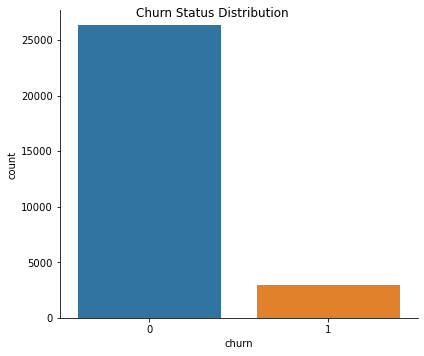

In [50]:
ax=sns.catplot(x = "churn", kind = "count", data = df_2, height=5, aspect=1.2)
ax.fig.suptitle('Churn Status Distribution')
plt.show()

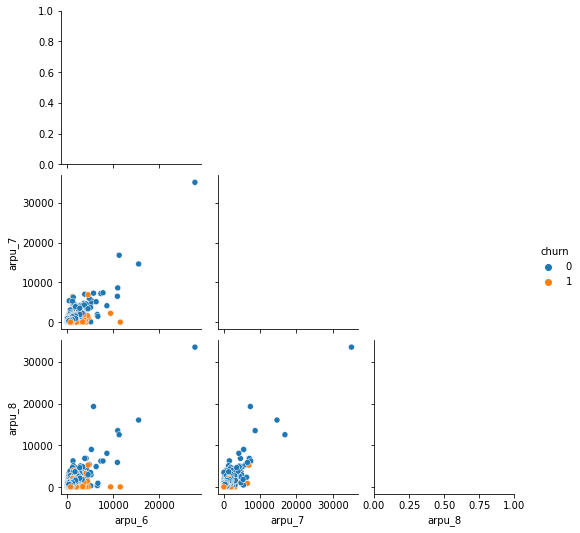

In [51]:
# Average Revenue per User Vs Churn
sns.pairplot(data = df_2[["arpu_6", "arpu_7", "arpu_8", "churn"]], hue = "churn", diag_kind = 'None', corner = True)
plt.show()

In [52]:
def box_plot_chart(uni_var):
    plt.figure(figsize=(20,16))
    
    plt.subplot(2,3,1)
    sns.boxplot(data = df_2, y = uni_var + "_6", x = "churn", hue = "churn",
            showfliers = False, palette = ("plasma"))

    plt.subplot(2,3,2)
    sns.boxplot(data = df_2, y = uni_var + "_7", x = "churn", hue = "churn",
            showfliers = False, palette = ("plasma"))
    
    plt.subplot(2,3,3)
    sns.boxplot(data = df_2, y = uni_var + "_8", x = "churn", hue = "churn",
            showfliers = False, palette = ("plasma")) 

    plt.show()

In [53]:
def bar_plot_chart(uni_var):
    plt.figure(figsize=(20,16))
    
    plt.subplot(2,3,1)
    sns.barplot(data = df_2, y = uni_var + "_6", x = "churn", hue = "churn") 
    
    plt.subplot(2,3,2)
    sns.barplot(data = df_2, y = uni_var + "_7", x = "churn", hue = "churn") 

    plt.subplot(2,3,3)
    sns.barplot(data = df_2, y = uni_var + "_8", x = "churn", hue = "churn") 

    plt.show()

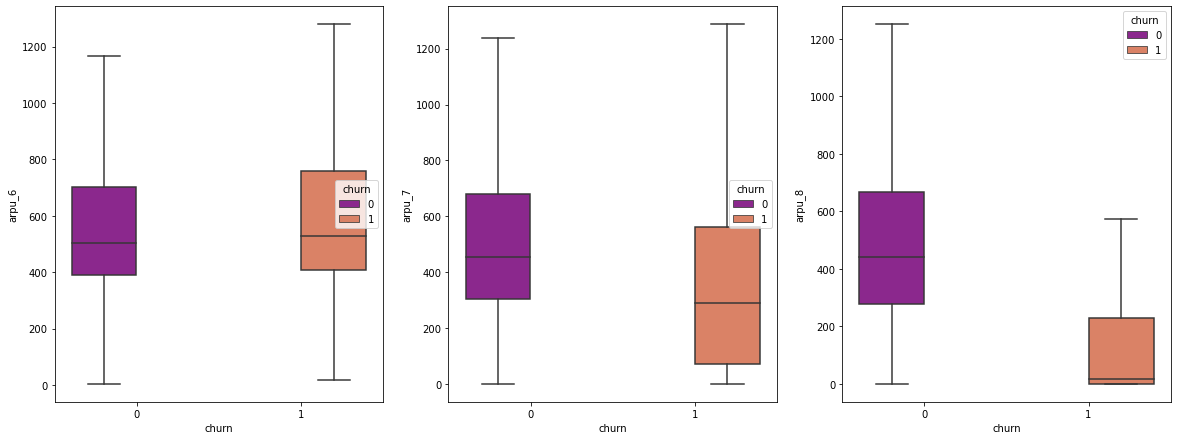

In [54]:
box_plot_chart("arpu")

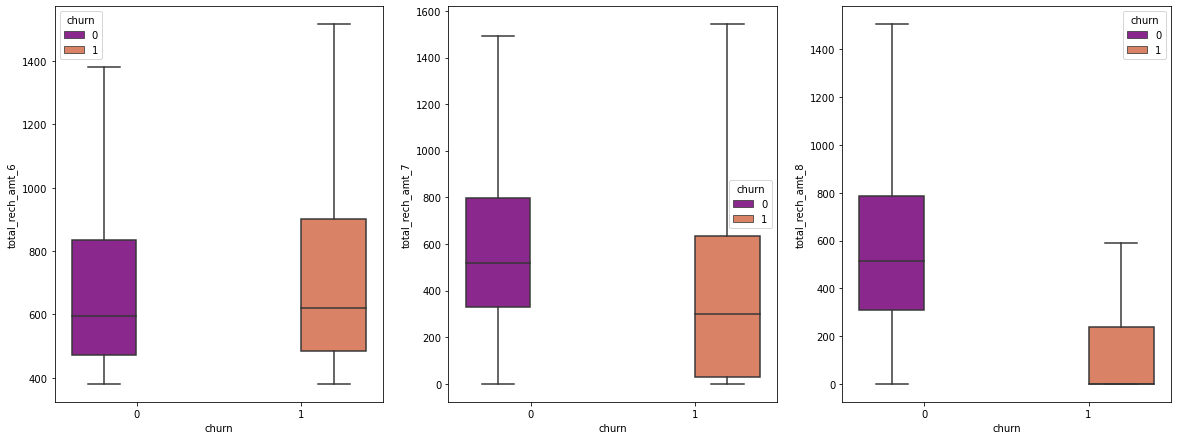

In [55]:
# Total Recharge Amount Per Month Vs Churn
box_plot_chart("total_rech_amt")

#### Insights: 
Customers that churn gradually reduces the recharge want.
Especially in the August month, their recharge amount reduces drastically.
Whereas those that do not churn have a consistent recharge amount every month.

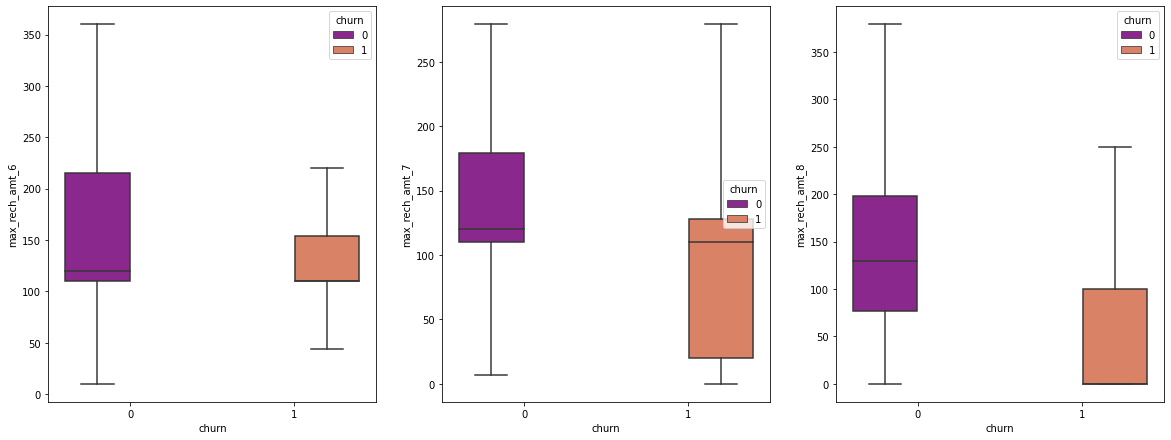

In [56]:
# Maximum Recharge Amount Data Per Month Vs Churn 

box_plot_chart("max_rech_amt") 

##### Insights: 
As with total recharge amount, there is a significant drop in Maximum recharge amount in the month of August.

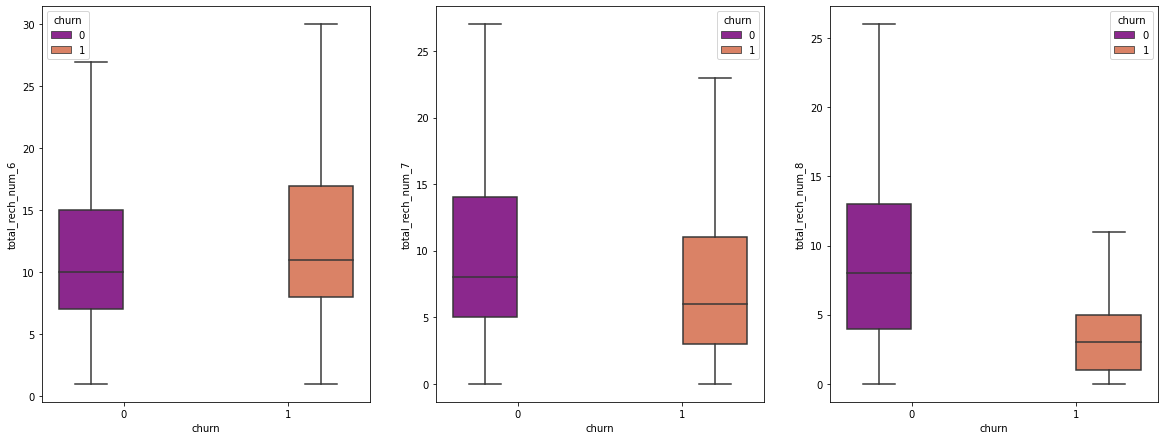

In [57]:
# Number of total recharges Per Month Vs Churn 

box_plot_chart("total_rech_num") 

##### Insights:
As with previous columns, number of recharges also reduces significantly for the August month.

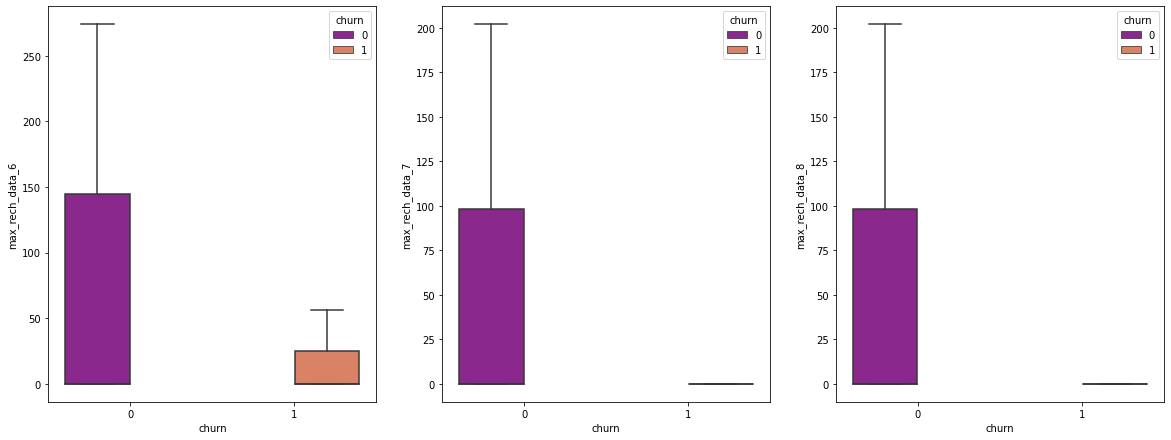

In [58]:
# Number of total recharges Per Month Vs Churn 

box_plot_chart("max_rech_data")  

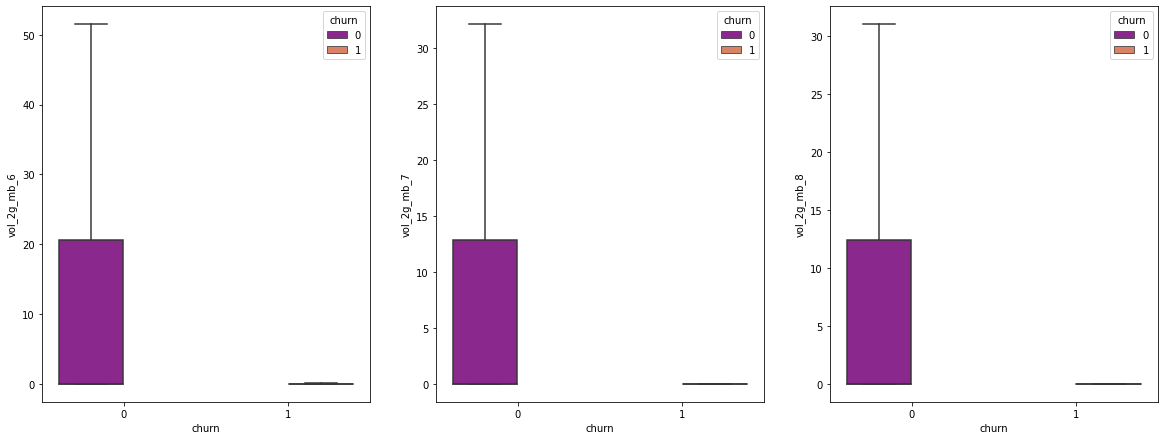

In [59]:
# 2G usage Vs Churn: 

box_plot_chart("vol_2g_mb") 

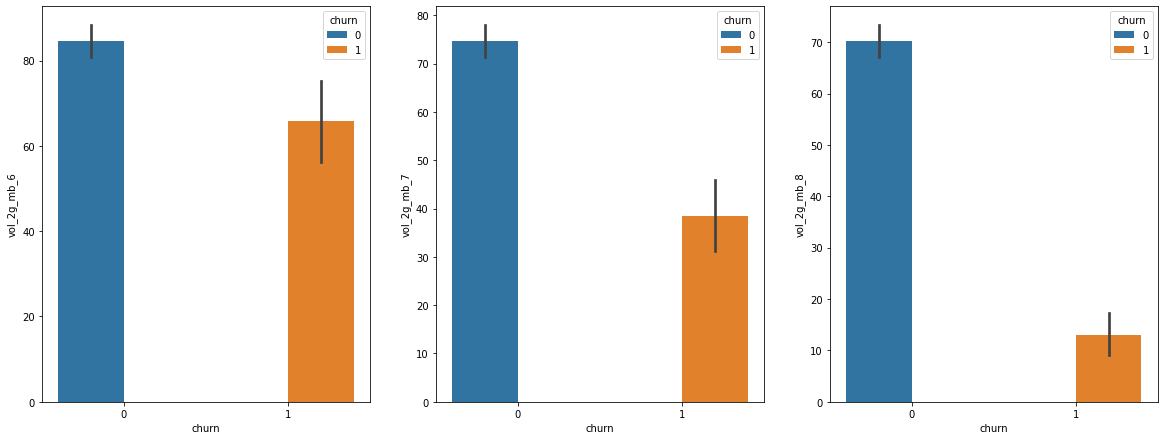

In [60]:
bar_plot_chart("vol_2g_mb")

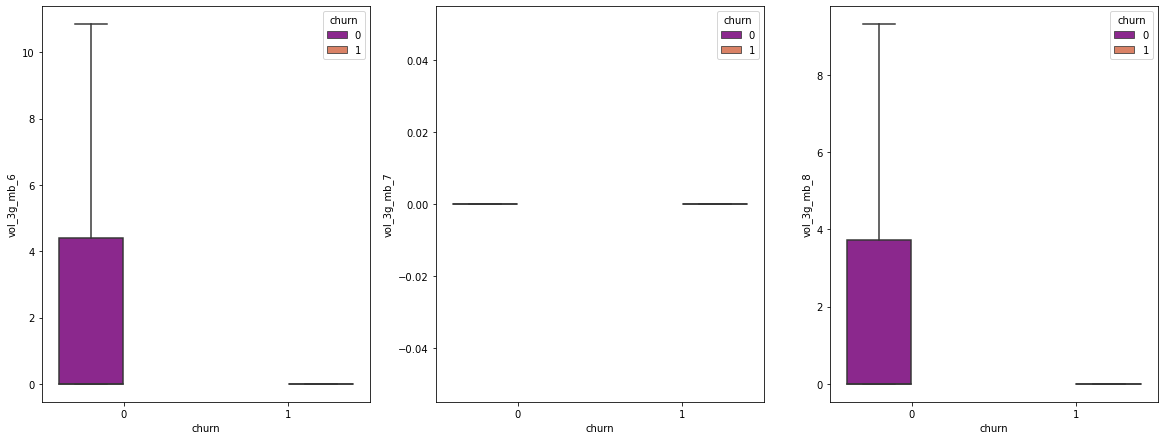

In [61]:
# 3G usage Vs Churn: 

box_plot_chart("vol_3g_mb") 

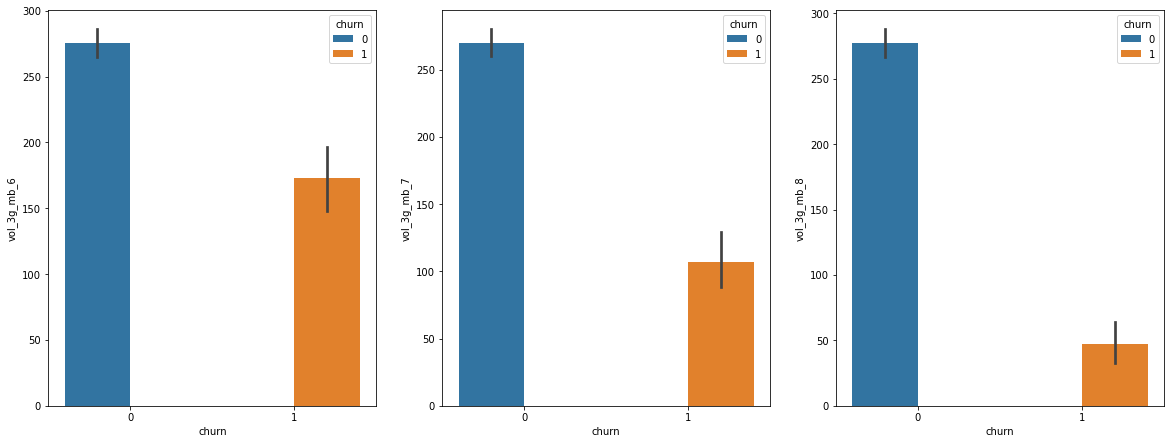

In [62]:
bar_plot_chart("vol_3g_mb")

#### Insights:

2G and 3G consumption has reduced significantly in last 2 months.
However, it remains consistent for the customers that do not churn.

In [63]:
# Volume based Cost:

vbc_col_list = ["jun_vbc_3g", "jul_vbc_3g", "aug_vbc_3g", "sep_vbc_3g"]
df_2.rename(columns = {"jun_vbc_3g" : "vbc_3g_6", "jul_vbc_3g" : "vbc_3g_7", "aug_vbc_3g" : "vbc_3g_8", "sep_vbc_3g" : "vbc_3g_9"}, inplace = True)

In [64]:
df_2.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8',
       'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9', 'churn'],
      dtype='object', length=144)

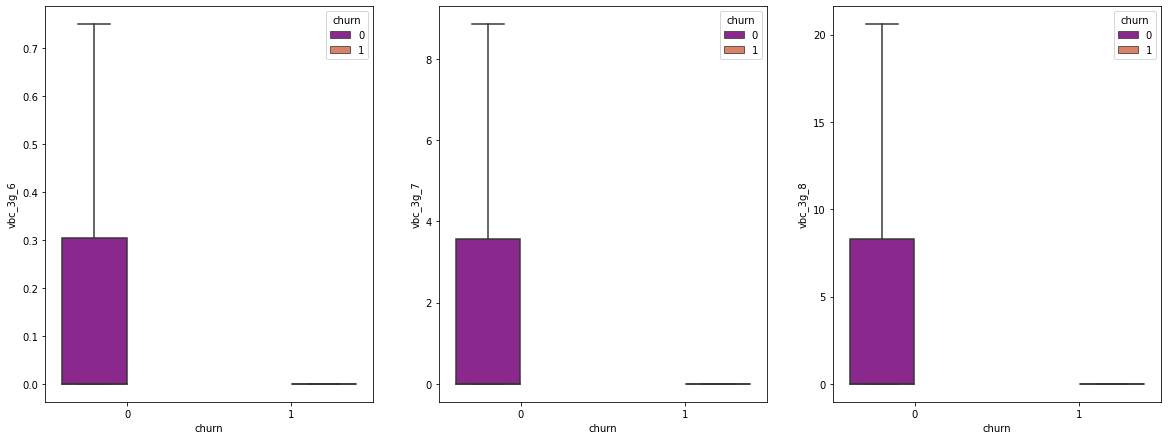

In [65]:
# Volume based cost Vs Churn:

box_plot_chart("vbc_3g")

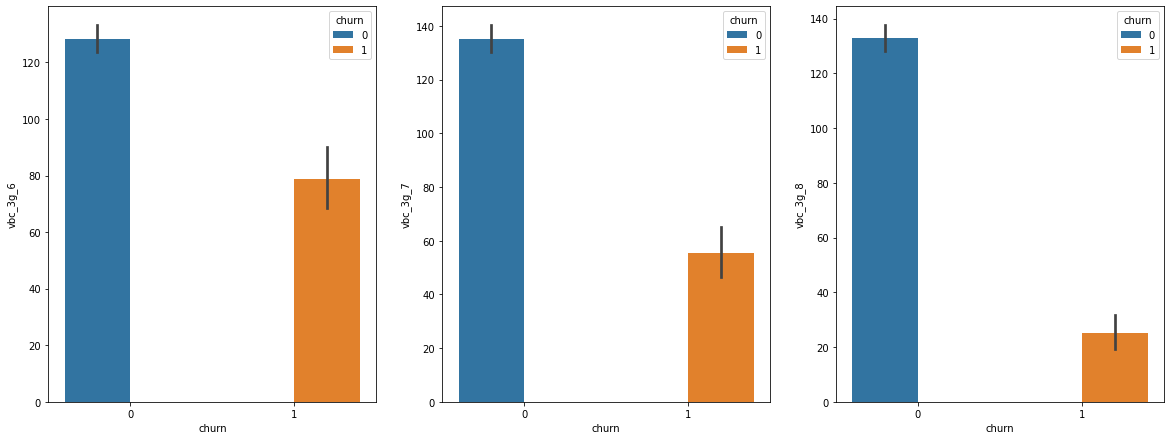

In [66]:
bar_plot_chart("vbc_3g")

#### Insights:
As depicted by the charts the volume based cost for 3G services have been reduced completely in the month of July and August.


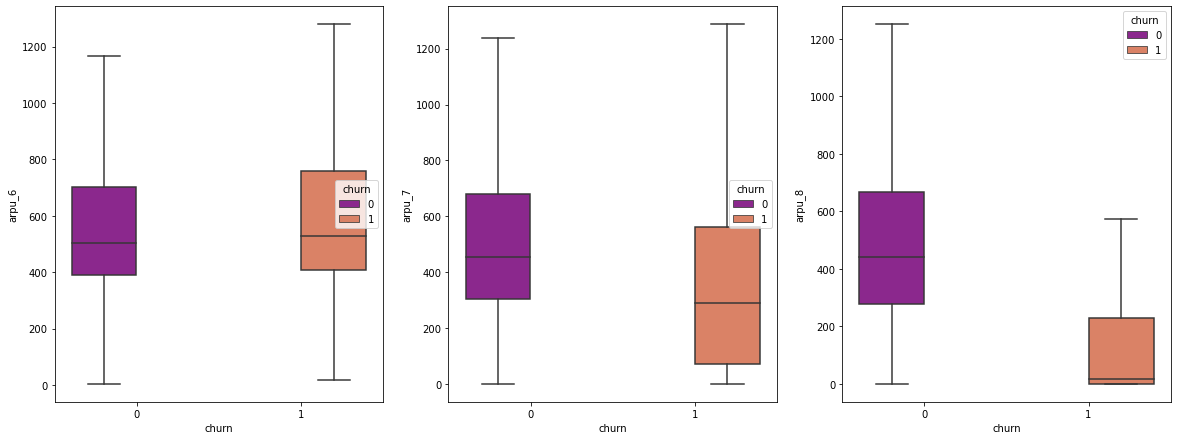

In [67]:
# Average Revenue per user Vs Churn:

box_plot_chart("arpu")

#### Insights:

The average revenue for users that have churned out have also been reduced in the last month of August.

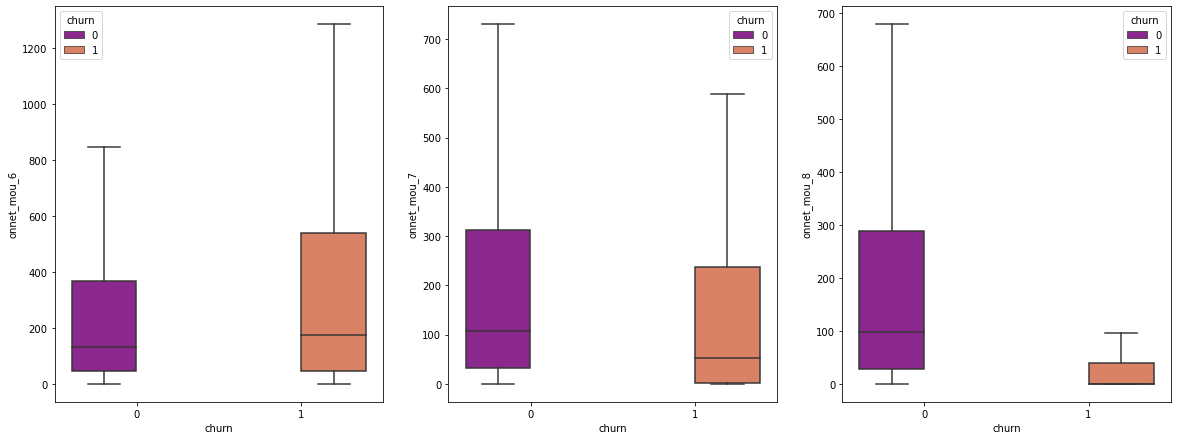

In [68]:
# Onnet MOU Vs Churn:

box_plot_chart("onnet_mou")

#### Insights:

The net minutes of usage for customers that have churned out have also been reduced in the last month of August.

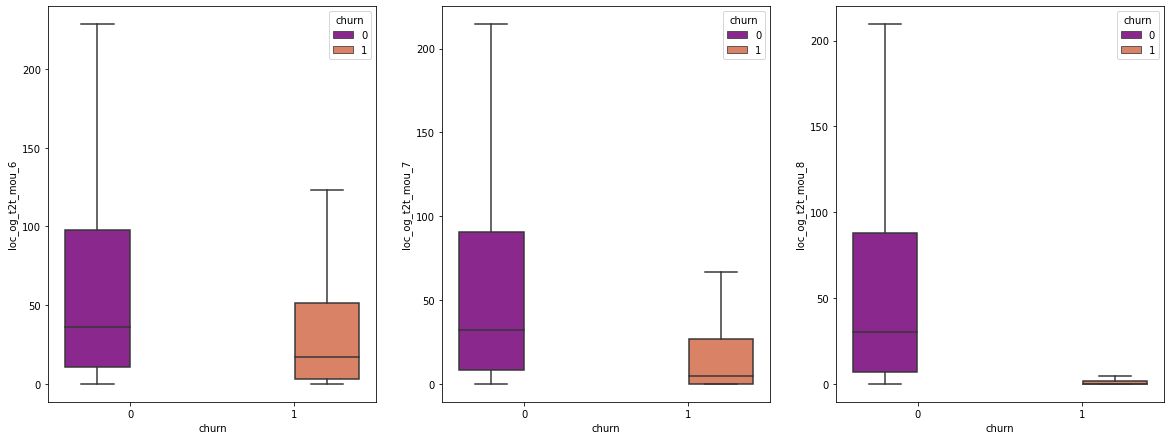

In [69]:
# Roaming MOU Vs Churn:

box_plot_chart("loc_og_t2t_mou")

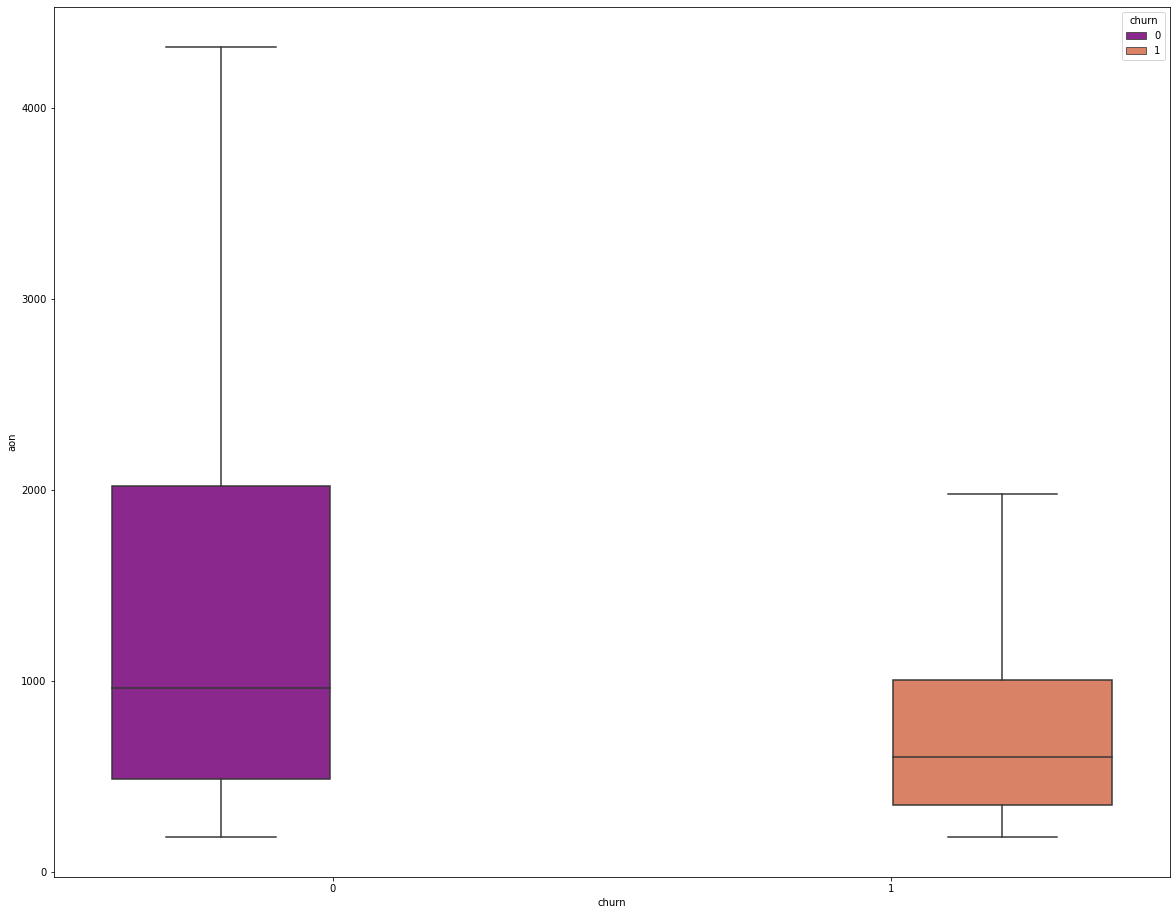

In [70]:
plt.figure(figsize=(20,16))
sns.boxplot(data = df_2, y = "aon", x = "churn", hue = "churn",
            showfliers = False, palette = ("plasma"))
    
plt.show()

### Insights:
Customers who churn out have less age on network compare to those who have spent more time on the network.

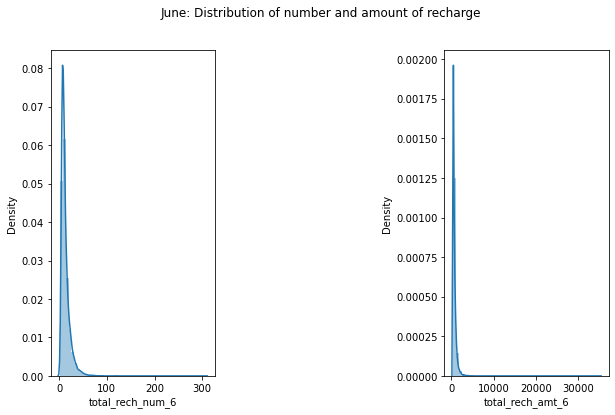

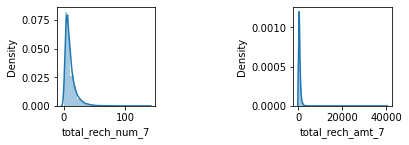

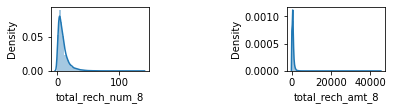

In [71]:
# Distribution of total recharge number and recharge amount:

s = plt.figure(figsize=(10, 6))
s.suptitle("June: Distribution of number and amount of recharge")

plt.subplot(1,3,1)
sns.distplot(df_2['total_rech_num_6'])

plt.subplot(1,3,3)
sns.distplot(df_2['total_rech_amt_6'])

plt.show()

plt.subplot(2,3,1)
sns.distplot(df_2['total_rech_num_7'])

plt.subplot(2,3,3)
sns.distplot(df_2['total_rech_amt_7'])

plt.show()

plt.subplot(3,3,1)
sns.distplot(df_2['total_rech_num_8'])

plt.subplot(3,3,3)
sns.distplot(df_2['total_rech_amt_8'])

plt.show()

#### Insights:
The distribution dies out early as we approach August from June.

#### Bivariate Analysis

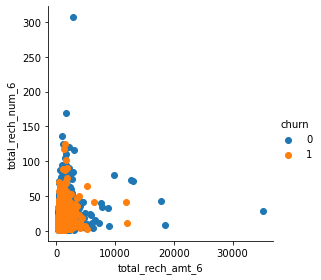

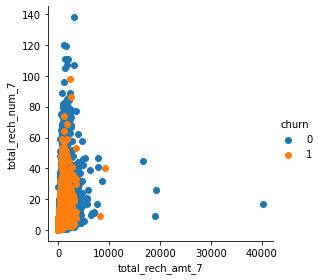

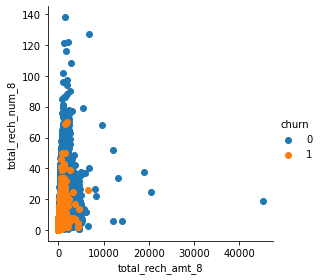

In [72]:
# Total Recharge amount between two consecutive months Vs Churn:

sns.FacetGrid(df_2, hue="churn", size=4).map(plt.scatter, "total_rech_amt_6", "total_rech_num_6").add_legend()
sns.FacetGrid(df_2, hue="churn", size=4).map(plt.scatter, "total_rech_amt_7", "total_rech_num_7").add_legend()
sns.FacetGrid(df_2, hue="churn", size=4).map(plt.scatter, "total_rech_amt_8", "total_rech_num_8").add_legend()



#### Insights:
Amount of recharge reduces from June to August for those customers that churn out.

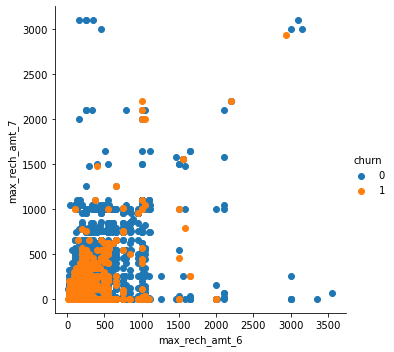

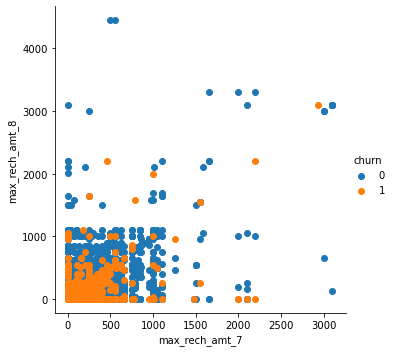

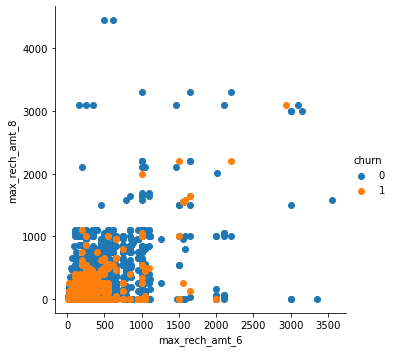

In [73]:
# Maximum Recharge amount between two consecutive months Vs Churn:

sns.FacetGrid(df_2, hue = "churn", size = 5).map(plt.scatter, "max_rech_amt_6", "max_rech_amt_7").add_legend()
sns.FacetGrid(df_2, hue = "churn", size = 5).map(plt.scatter, "max_rech_amt_7", "max_rech_amt_8").add_legend()
sns.FacetGrid(df_2, hue = "churn", size = 5).map(plt.scatter, "max_rech_amt_6", "max_rech_amt_8").add_legend()



#### Insights:
Those customers that churn out are less likely to make large recharge amounts.

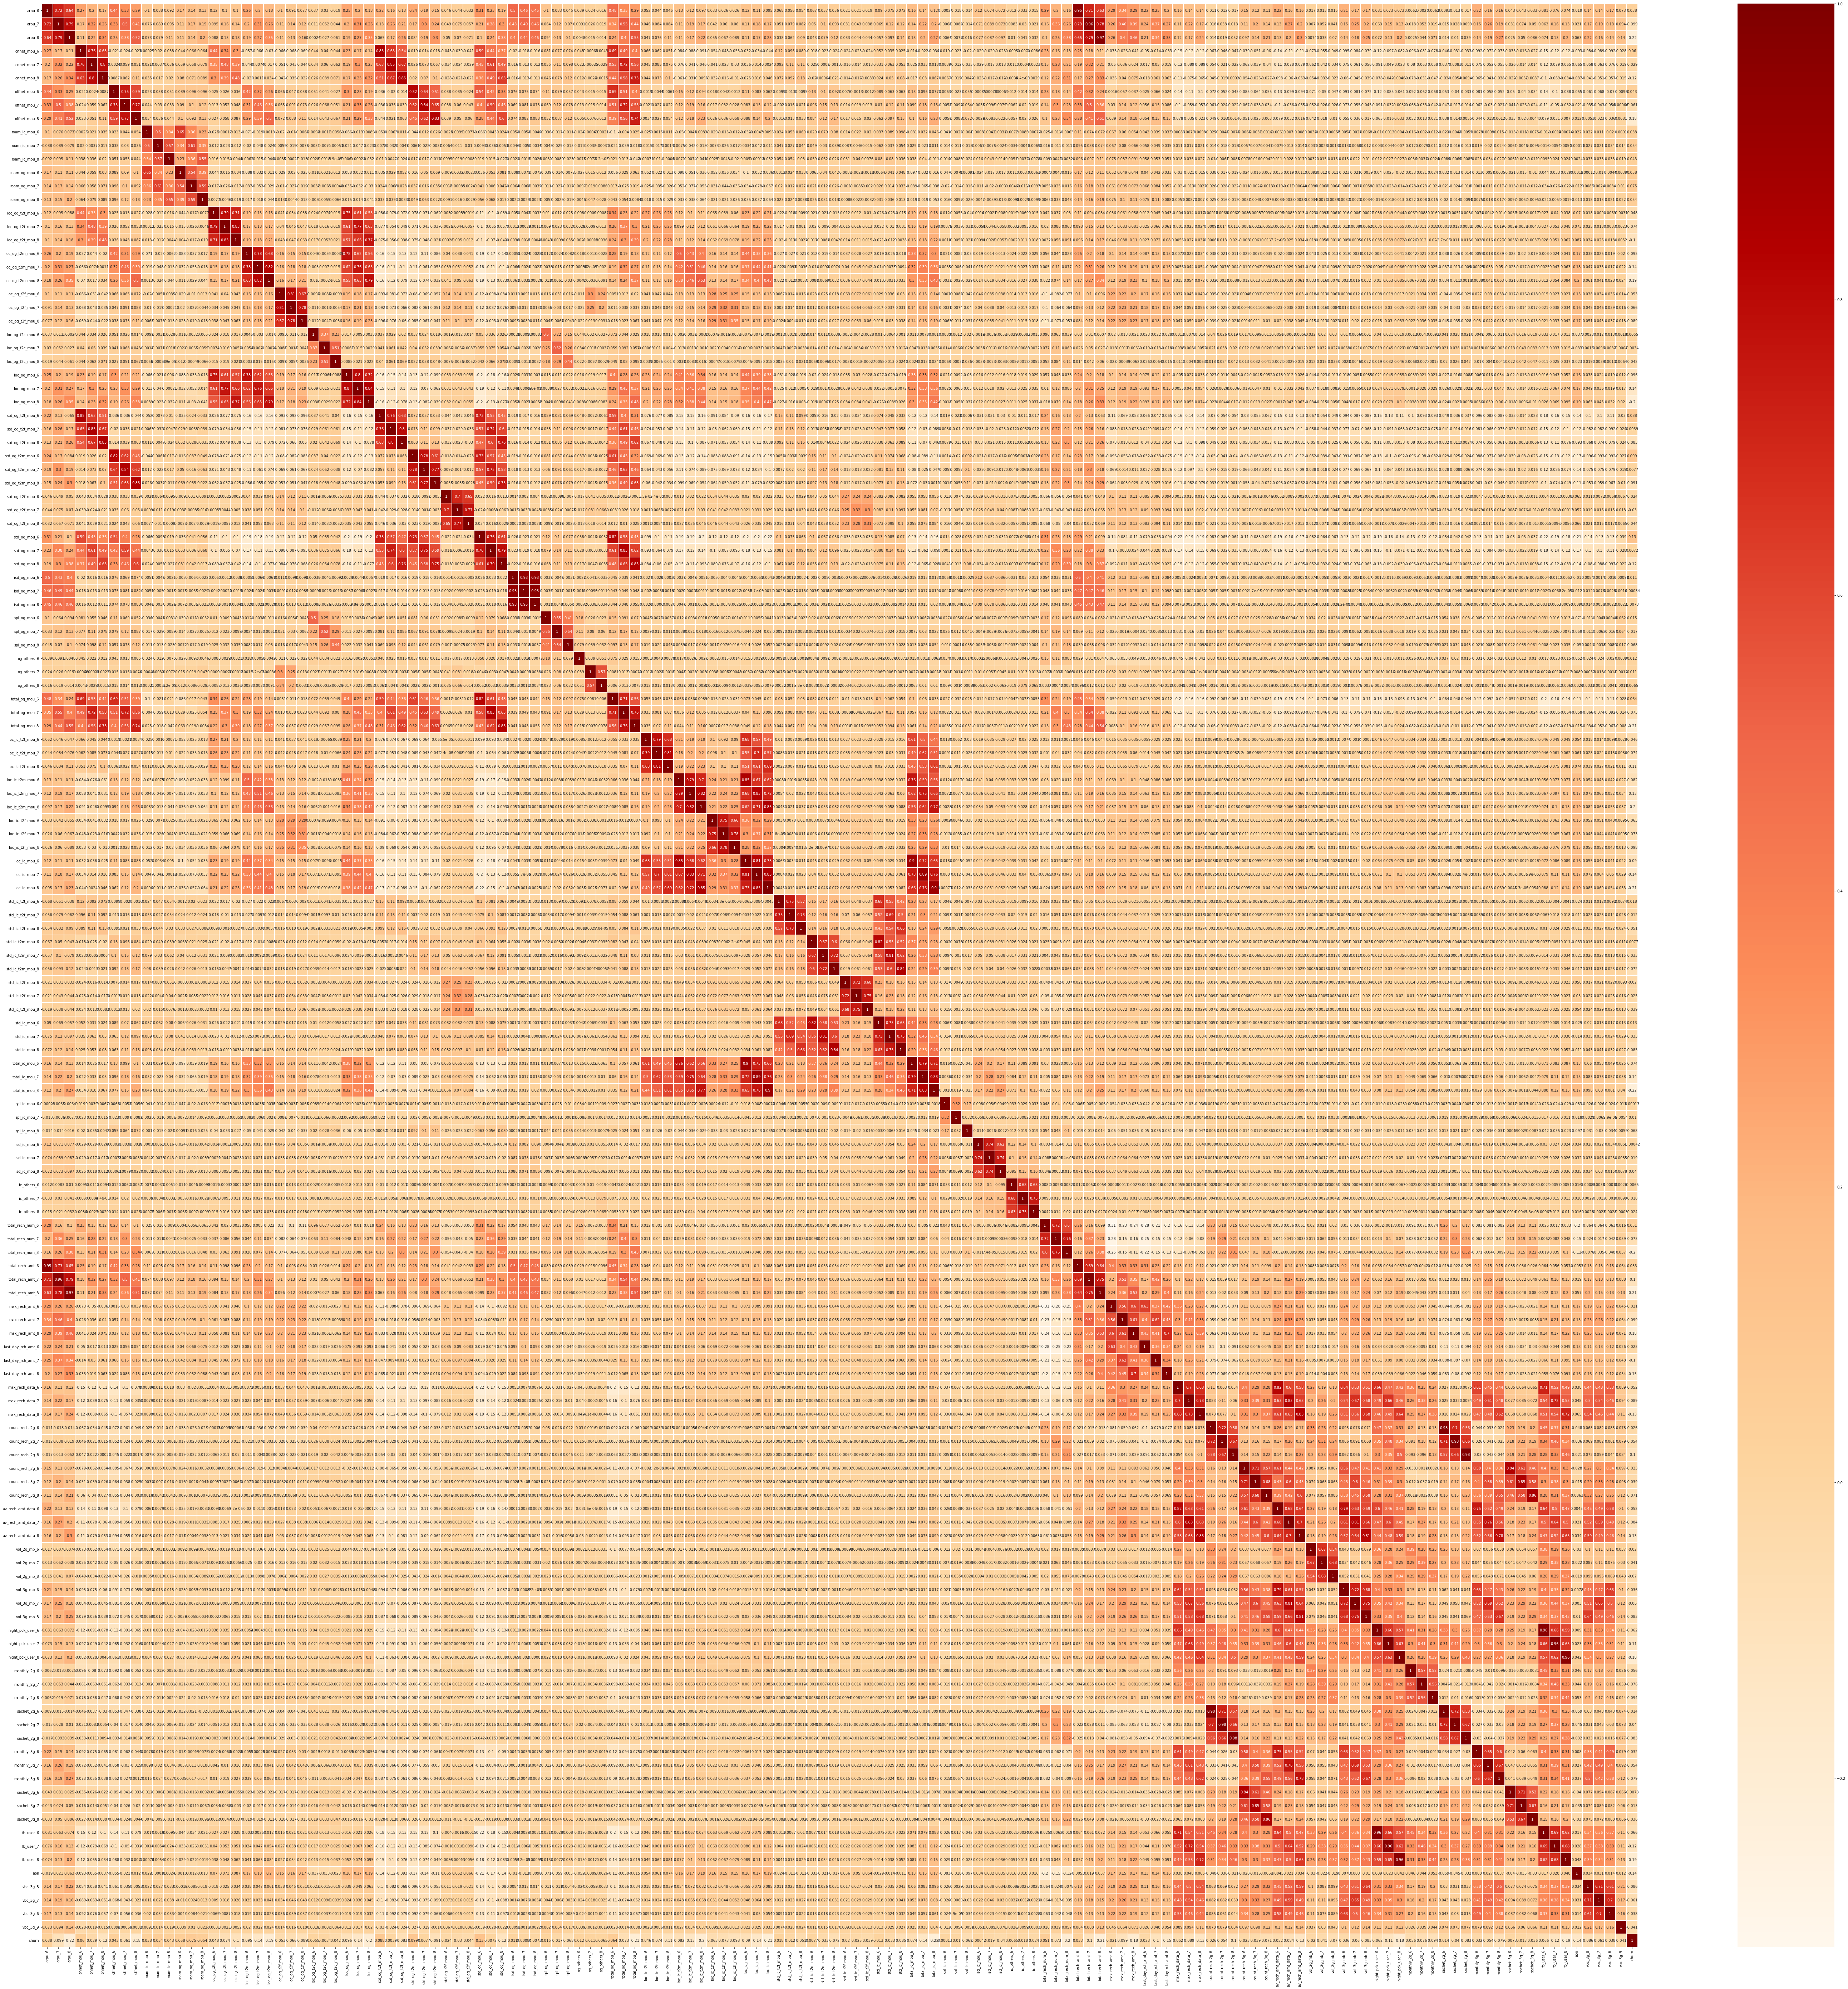

In [74]:
plt.figure(figsize=(100, 100))
sns.heatmap(df_2.corr(), cmap = "OrRd", annot=True, linewidth=0.3, cbar_kws={"shrink": 1.0})
plt.show()

In [75]:
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [76]:
pd.set_option('precision', 2)
cor_0 = correlation(churned_customers)

cor_0

VAR1              VAR2  CORR
7043        og_others_7       og_others_8  1.00
8450    count_rech_2g_8       sachet_2g_8  0.99
2105        sachet_2g_7   count_rech_2g_7  0.99
11350       sachet_2g_6   count_rech_2g_6  0.98
8887   night_pck_user_6         fb_user_6  0.96
...                 ...               ...   ...
2711   loc_og_t2f_mou_7       sachet_3g_7  0.00
4311   std_ic_t2t_mou_8     roam_og_mou_7  0.00
10342  total_rech_amt_7   count_rech_2g_6  0.00
2713   loc_og_t2f_mou_7  total_rech_num_7  0.00
11507      spl_ic_mou_8       og_others_8  0.00

[10153 rows x 3 columns]

In [77]:
# filtering for correlations >= 90%
condition = cor_0['CORR'] > 0.9
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

In [78]:
df_2.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8',
       'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9', 'churn'],
      dtype='object', length=144)

#### Insights:
- Customers that have high recharge amount are less likely to churn out.
- Customers who are to churn out can be observed to gradually reduce the recharge amount, the number of times recharge is done.
- Customers that are associated with the network for longer duration are less likely to churn out.
- Customers that churn out have reduced arpu.

### Modelling

#### Splitting the data

In [79]:
# importing libraries:
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


In [80]:
df_model_data = df_2

In [81]:
X = df_model_data.drop("churn", axis = 1)
y = df_model_data.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 4, stratify = y)

In [82]:
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
79943  427.38  254.06  405.40       566.21       111.26       236.06   
39819  396.67  184.36   41.44         2.05         1.26         1.56   
48942  634.77  524.71  442.23      1188.94      1052.93       526.31   
22240  386.08  537.00  523.27       416.96       596.09       664.89   
91709  426.41  360.64  366.70        41.46        35.59        43.66   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
79943        280.09        143.31        175.91            0.0  ...   
39819        572.68        259.19          9.28            0.0  ...   
48942        259.18        172.84        168.46            0.0  ...   
22240        190.51        137.83        148.86            0.0  ...   
91709        408.28        381.21        359.39            0.0  ...   

       sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
79943            0            0       -1.0       -1.0       -1.0  1022   
39819            0            0       -1.0       -1.0       -1.0   444   
48942            0            0       -1.0       -1.0       -1.0  1790   
22240            0            0        0.0        0.0        0.0  1072   
91709            0            0       -1.0       -1.0       -1.0  1431   

       vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
79943       0.0       0.0       0.0       0.0  
39819       0.0       0.0       0.0       0.0  
48942       0.0       0.0       0.0       0.0  
22240       0.0       0.0       0.0       0.0  
91709       0.0       0.0       0.0       0.0  

[5 rows x 143 columns]

In [83]:
X_test.head()

arpu_6  arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
15542  380.49  722.31  1228.64       986.58      1736.33      2384.39   
41984  302.79  308.63   410.52        14.53        22.44        26.94   
82974  303.31  338.21   148.44       100.79       157.73        63.56   
36181  589.80  641.11   881.38       107.34       121.96       132.08   
11221  448.21   23.85     0.00        93.53         0.98         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
15542         84.06        341.94       1344.96           0.00  ...   
41984        168.18        213.34        260.28           0.00  ...   
82974        462.61        422.01         46.71           0.00  ...   
36181        496.39        541.34        732.58          18.94  ...   
11221        403.83         38.23          0.00           0.00  ...   

       sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
15542            0            0        1.0        0.0        1.0   403   
41984            0            0       -1.0       -1.0       -1.0  3263   
82974            0            0       -1.0       -1.0       -1.0  1834   
36181            0            0       -1.0       -1.0       -1.0  3049   
11221            0            0       -1.0       -1.0       -1.0   192   

       vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
15542       0.0       0.0       0.0       0.0  
41984       0.0       0.0       0.0       0.0  
82974       0.0       0.0       0.0       0.0  
36181       0.0       0.0       0.0       0.0  
11221       0.0       0.0       0.0       0.0  

[5 rows x 143 columns]

In [84]:
y_train.head()

79943    0
39819    1
48942    0
22240    0
91709    0
Name: churn, dtype: int64

In [85]:
y_test.head()

15542    0
41984    0
82974    0
36181    0
11221    1
Name: churn, dtype: int64

#### Data Scalling:

In [86]:
df_scaled = StandardScaler()
X_train_scaled = df_scaled.fit_transform(X_train)
X_test_scaled = df_scaled.transform(X_test)

In [87]:
X_train_scaled 

array([[-0.41126137, -0.56120492, -0.17476815, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.48039847, -0.70330211, -0.90406088, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [ 0.05562907, -0.00938791, -0.10097084, ..., -0.31946121,
        -0.31889724, -0.12382637],
       ...,
       [-0.74528971, -0.32649328, -0.45134426, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.25302948, -0.45522993, -0.15920076, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.63839398, -0.50207235, -0.20856996, ..., -0.31946121,
        -0.31889724, -0.12382637]])

In [88]:
X_test_scaled

array([[-0.51683109,  0.39347937,  1.47482389, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.69174954, -0.44994932, -0.16449676, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.69059238, -0.38962607, -0.68966415, ..., -0.31946121,
        -0.31889724, -0.12382637],
       ...,
       [ 0.46983033,  0.17564732, -0.21562929, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.46440756, -0.91131306, -0.98709764, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.30492846, -0.31340187,  0.18179496, ..., -0.31946121,
        -0.31889724, -0.1218248 ]])

In [89]:
# SMOTE to balance the variable

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_train_bal, y_train_bal = sm.fit_sample(X_train_scaled, y_train.ravel())

In [90]:
X_train_bal

array([[-0.41126137, -0.56120492, -0.17476815, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.48039847, -0.70330211, -0.90406088, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [ 0.05562907, -0.00938791, -0.10097084, ..., -0.31946121,
        -0.31889724, -0.12382637],
       ...,
       [-0.58699932, -0.92521002, -0.98709764, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.26027636, -0.17350299, -0.8780983 , ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.30208024, -1.02182667, -0.98709764, ..., -0.31946121,
        -0.11386288, -0.12382637]])

In [91]:
y_train_bal

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

#### Logistic Regression Model:

In [92]:
log_reg_model = LogisticRegression()
rfe = RFE(log_reg_model,20)
rfe.fit(X_train_bal, y_train_bal)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [93]:
rfe_features = df_model_data.drop('churn', axis=1).columns[rfe.support_]
rfe_features

Index(['arpu_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'aon', 'vbc_3g_9'],
      dtype='object')

In [94]:
X_lr_rfe = pd.DataFrame(X_train_bal).iloc[:, rfe.support_]
X_lr_rfe.head()
X_lr_rfe.columns = rfe_features
X_lr_rfe.head()

arpu_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_7  loc_og_mou_8  \
0   -0.41     -5.07e-01         -0.36             -0.14         -0.30   
1   -0.48     -2.58e-01         -0.73             -0.35         -0.67   
2    0.06     -4.43e-01         -0.38             -0.07         -0.58   
3   -0.50     -5.19e-01         -0.42             -0.18         -0.34   
4   -0.41      4.87e-03          0.04             -0.21          0.41   

   spl_og_mou_8  loc_ic_t2t_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0          0.20             -0.09             -0.25             -0.33   
1         -0.28             -0.16             -0.67             -0.33   
2         -0.10             -0.16             -0.64             -0.33   
3         -0.28             -0.13             -0.43             -0.33   
4         -0.28             -0.32              0.52              0.32   

   loc_ic_mou_8  std_ic_t2m_mou_7  std_ic_mou_8  total_ic_mou_7  spl_ic_mou_8  \
0         -0.41             -0.26         -0.30           -0.37          3.90   
1         -0.70             -0.18         -0.34            0.14         -0.24   
2         -0.65              0.24         -0.11           -0.23         -0.24   
3         -0.51             -0.31         -0.21           -0.52         -0.24   
4          0.32             -0.27         -0.29            0.57         -0.24   

   isd_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  fb_user_8   aon  \
0         -0.15              0.96               -0.43      -0.75 -0.24   
1         -0.15             -0.73               -0.64      -0.75 -0.83   
2         -0.15             -0.05               -0.29      -0.75  0.56   
3         -0.15              0.06               -0.64       0.34 -0.18   
4         -0.15              0.29                0.37      -0.75  0.19   

   vbc_3g_9  
0     -0.12  
1     -0.12  
2     -0.12  
3     -0.12  
4     -0.12

In [95]:
y_rfe = y_train_bal

In [96]:
log_reg_rfe = LogisticRegression(random_state=100)
log_reg_rfe.fit(X_lr_rfe, y_rfe)

LogisticRegression(random_state=100)

In [97]:
X_test_rfe = pd.DataFrame(X_test_scaled).iloc[:, rfe.support_]
y_pred = log_reg_rfe.predict(X_test_rfe)

In [98]:
X_test_rfe

0     7     8      16    29        47    55    59    62    65    70   \
0    -0.52 -0.08  2.22  -0.20 -0.45  8.32e+00  0.19 -0.56 -0.30 -0.37  0.85   
1    -0.69 -0.36 -0.18  -0.27 -0.35 -2.83e-01 -0.35 -0.40 -0.22 -0.49 -0.31   
2    -0.69  0.09 -0.65  -0.31 -0.67 -2.83e-01 -0.32 -0.68 -0.33 -0.73 -0.30   
3    -0.05  0.35  0.87  -0.14  0.93  1.97e-01 -0.16  1.78  0.17  1.25 -0.22   
4    -0.36 -0.73 -0.75  -0.35 -0.67 -2.83e-01 -0.38 -0.68 -0.33 -0.73 -0.31   
...    ...   ...   ...    ...   ...       ...   ...   ...   ...   ...   ...   
8794  1.81  1.48  1.86   1.06  3.33  1.14e-01  0.94  5.43 -0.33  4.15 -0.18   
8795 -0.13 -0.72 -0.54  10.03  4.94  1.16e+00 -0.08 -0.58 -0.30 -0.30 -0.31   
8796  0.47  0.15 -0.16  -0.16  0.15 -2.23e-01 -0.10 -0.39 -0.33 -0.41 -0.30   
8797 -0.46 -0.72 -0.75  -0.30 -0.67 -2.83e-01 -0.21 -0.68 -0.33 -0.73 -0.31   
8798 -0.30 -0.19  0.04  -0.14  0.33  7.29e-03 -0.17  0.33  0.78  0.22 -0.14   

       77    79    83    86    92    101   137   138   142  
0     0.40  0.05 -0.24 -0.15  2.76 -0.34  1.42 -0.88 -0.12  
1    -0.19 -0.53 -0.24 -0.15 -0.61 -0.64 -0.75  2.08 -0.12  
2    -0.34 -0.74 -0.24 -0.15 -0.61 -0.64 -0.75  0.60 -0.12  
3    -0.01  0.39  1.09 -0.15 -0.05  0.27 -0.75  1.86 -0.12  
4    -0.34 -0.79 -0.24 -0.15 -0.84 -0.64 -0.75 -1.09 -0.12  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
8794 -0.31  2.66 -0.24  2.81  3.77 -0.29  1.42 -0.37 -0.12  
8795 -0.31 -0.61 -0.24 -0.15  2.42 -0.57 -0.75 -0.76 -0.12  
8796 -0.34 -0.37 -0.24 -0.15  0.40 -0.43 -0.75  0.44 -0.12  
8797 -0.34 -0.44 -0.24 -0.15 -1.06 -0.64 -0.75  0.35 -0.12  
8798  0.03  0.25 -0.24 -0.15 -0.50  0.87 -0.75  1.68 -0.12  

[8799 rows x 20 columns]

In [99]:
y_rfe

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [100]:
confusion_matrix(y_test, y_pred)

array([[6510, 1394],
       [ 140,  755]], dtype=int64)

In [101]:
accuracy_score(y_test, y_pred)

0.8256620070462553

In [102]:
log_reg_rfe.score(X_test_rfe, y_test)

0.8256620070462553

In [184]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7904
           1       0.38      0.84      0.52       895

    accuracy                           0.85      8799
   macro avg       0.68      0.84      0.72      8799
weighted avg       0.92      0.85      0.87      8799



In [104]:
intercept_df = pd.DataFrame(log_reg_rfe.intercept_.reshape((1,1)), columns = ['intercept'])

In [105]:
intercept_df

intercept
0      -2.23

In [106]:
rfe_features

Index(['arpu_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'aon', 'vbc_3g_9'],
      dtype='object')

In [107]:
coef_df = pd.DataFrame(log_reg_rfe.coef_.reshape((20,1)), columns = ['coefficeints'])
col_df = pd.DataFrame(rfe_features,columns=['Col_name'])

In [186]:
coef_df  

coefficeints
0           0.54
1           0.27
2          -0.39
3           0.35
4          -1.28
5          -0.45
6          -0.50
7          -0.61
8          -0.41
9          -1.47
10         -0.32
11         -0.90
12          1.19
13         -0.33
14         -0.59
15         -0.74
16         -0.59
17         -0.65
18         -0.38
19         -0.64

In [109]:
col_df

Col_name
0               arpu_6
1         offnet_mou_7
2         offnet_mou_8
3     loc_og_t2t_mou_7
4         loc_og_mou_8
5         spl_og_mou_8
6     loc_ic_t2t_mou_7
7     loc_ic_t2m_mou_8
8     loc_ic_t2f_mou_8
9         loc_ic_mou_8
10    std_ic_t2m_mou_7
11        std_ic_mou_8
12      total_ic_mou_7
13        spl_ic_mou_8
14        isd_ic_mou_8
15    total_rech_num_8
16  last_day_rch_amt_8
17           fb_user_8
18                 aon
19            vbc_3g_9

coefficients = pd.concat([coef_df, col_df], axis=1)
coefficients

#### Insights: 
1. Customers who use mobile internet less in August are more likely to churn.
2. Customers who use more mobile internet during good phase(June and July) are less likely to churn.
3. Customers who use scheme of particluar night hrs are less likely to churn.
4. Customers who recharge less frequently in AUgust are more likely to churn. 
5. Customers with less outgoing calls in August are more likely to churn.

In [110]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_bal, y_train_bal)
rf1_y_pred = rf1.predict(X_test_scaled)

In [111]:
accuracy_score(y_test,rf1_y_pred)

0.9290828503239005

In [112]:
confusion_matrix(y_test,rf1_y_pred) 

array([[7530,  374],
       [ 250,  645]], dtype=int64)

In [187]:
print (classification_report(y_test,rf1_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7904
           1       0.63      0.72      0.67       895

    accuracy                           0.93      8799
   macro avg       0.80      0.84      0.82      8799
weighted avg       0.93      0.93      0.93      8799



In [114]:
X = X_train_bal
X = pd.DataFrame(X_train_bal)
X.columns = df_model_data.drop('churn',axis=1).columns
X.head()

arpu_6    arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.41 -5.61e-01   -0.17         0.57        -0.34        -0.01   
1   -0.48 -7.03e-01   -0.90        -0.66        -0.58        -0.53   
2    0.06 -9.39e-03   -0.10         1.92         1.68         0.64   
3   -0.50  1.57e-02    0.06         0.24         0.70         0.94   
4   -0.41 -3.44e-01   -0.25        -0.58        -0.50        -0.44   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  sachet_3g_7  \
0         -0.33     -5.07e-01         -0.36          -0.22  ...        -0.15   
1          0.31     -2.58e-01         -0.73          -0.22  ...        -0.15   
2         -0.37     -4.43e-01         -0.38          -0.22  ...        -0.15   
3         -0.52     -5.19e-01         -0.42          -0.22  ...        -0.15   
4         -0.05      4.87e-03          0.04          -0.22  ...        -0.15   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  vbc_3g_8  vbc_3g_7  \
0        -0.14      -0.79      -0.74      -0.75 -0.24     -0.32     -0.32   
1        -0.14      -0.79      -0.74      -0.75 -0.83     -0.32     -0.32   
2        -0.14      -0.79      -0.74      -0.75  0.56     -0.32     -0.32   
3        -0.14       0.26       0.34       0.34 -0.18     -0.32     -0.32   
4        -0.14      -0.79      -0.74      -0.75  0.19     -0.32     -0.32   

   vbc_3g_6  vbc_3g_9  
0     -0.32     -0.12  
1     -0.32     -0.12  
2     -0.32     -0.12  
3     -0.32     -0.12  
4     -0.32     -0.12  

[5 rows x 143 columns]

<AxesSubplot:>

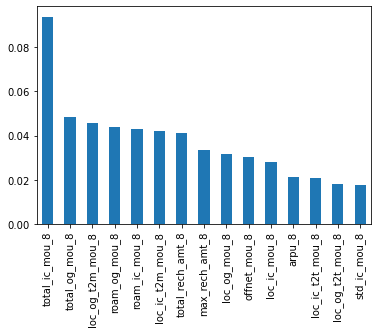

In [115]:
rf1.feature_importances_.shape
importances = rf1.feature_importances_
importances.shape
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

In [192]:
weights.sort_values(ascending=False)[:15]

total_ic_mou_8      0.09
total_og_mou_8      0.05
loc_og_t2m_mou_8    0.05
roam_og_mou_8       0.04
roam_ic_mou_8       0.04
loc_ic_t2m_mou_8    0.04
total_rech_amt_8    0.04
max_rech_amt_8      0.03
loc_og_mou_8        0.03
offnet_mou_8        0.03
loc_ic_mou_8        0.03
arpu_8              0.02
loc_ic_t2t_mou_8    0.02
loc_og_t2t_mou_8    0.02
std_ic_mou_8        0.02
dtype: float64

#### Insights:
Columns mentioned on the X-axis are the top features that explains churn rate.

### PCA to reduce the number of features

In [116]:
df_model_data.shape

(29327, 144)

In [117]:
df_PCA = df_model_data.copy(deep = True)
df_PCA

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6       429.02   190.70   255.11        71.03        45.03        76.66   
7      1069.18  1349.85  3171.48        57.84        54.68        52.29   
8       378.72   492.22   137.36       413.69       351.03        35.08   
13      492.85   205.67   593.26       501.76       108.39       534.24   
16      430.98   299.87   187.89        50.51        74.01        70.61   
...        ...      ...      ...          ...          ...          ...   
99974   414.30   321.09   371.02        17.56         0.00         1.30   
99980   581.40    43.66   262.89       273.88         3.93        62.64   
99986   644.97   455.23   564.33       806.73       549.36       775.41   
99997   322.99   303.39   606.82         0.00         0.00         0.00   
99998   687.07     0.00     0.00        84.34         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
6            262.73         49.24         92.08           0.00  ...   
7            453.43        567.16        325.91          16.23  ...   
8             94.66         80.63        136.48           0.00  ...   
13           413.31        119.28        482.46          23.53  ...   
16           296.29        229.74        162.76           0.00  ...   
...             ...           ...           ...            ...  ...   
99974        428.41        366.78        360.58           0.00  ...   
99980        722.43          8.53        273.14          13.04  ...   
99986        784.76        617.13        595.44           0.00  ...   
99997          0.00          0.00          0.00           0.00  ...   
99998        166.46          0.00          0.00           0.00  ...   

       sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  vbc_3g_8  vbc_3g_7  \
6                0       -1.0       -1.0       -1.0  1673      0.00      0.00   
7                0       -1.0       -1.0       -1.0   802     57.74     19.38   
8                0       -1.0        1.0        1.0   315     21.03    910.65   
13               0       -1.0       -1.0        1.0  2607      0.00      0.00   
16               0       -1.0       -1.0       -1.0   511      0.00      2.45   
...            ...        ...        ...        ...   ...       ...       ...   
99974            0       -1.0       -1.0       -1.0  3054      0.00      0.00   
99980            0        1.0       -1.0        0.0  1689      0.00      0.00   
99986            0        1.0        1.0        1.0  2696    497.45    598.67   
99997            0        1.0        1.0        1.0   478   1445.74   1151.03   
99998            0        1.0       -1.0       -1.0   751      0.00      0.00   

       vbc_3g_6  vbc_3g_9  churn  
6          0.00       0.0      0  
7         18.74       0.0      1  
8        122.16       0.0      0  
13         0.00       0.0      0  
16        21.89       0.0      0  
...         ...       ...    ...  
99974      0.00       0.0      0  
99980      0.00       0.0      0  
99986    604.08       0.0      0  
99997   1173.18       0.0      0  
99998      0.00       0.0      1  

[29327 rows x 144 columns]

In [118]:
# Train and Test Split for PCA:

X = df_PCA.drop("churn", axis = 1)
y = df_PCA.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 4, stratify = y)

In [119]:
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
79943  427.38  254.06  405.40       566.21       111.26       236.06   
39819  396.67  184.36   41.44         2.05         1.26         1.56   
48942  634.77  524.71  442.23      1188.94      1052.93       526.31   
22240  386.08  537.00  523.27       416.96       596.09       664.89   
91709  426.41  360.64  366.70        41.46        35.59        43.66   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
79943        280.09        143.31        175.91            0.0  ...   
39819        572.68        259.19          9.28            0.0  ...   
48942        259.18        172.84        168.46            0.0  ...   
22240        190.51        137.83        148.86            0.0  ...   
91709        408.28        381.21        359.39            0.0  ...   

       sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
79943            0            0       -1.0       -1.0       -1.0  1022   
39819            0            0       -1.0       -1.0       -1.0   444   
48942            0            0       -1.0       -1.0       -1.0  1790   
22240            0            0        0.0        0.0        0.0  1072   
91709            0            0       -1.0       -1.0       -1.0  1431   

       vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
79943       0.0       0.0       0.0       0.0  
39819       0.0       0.0       0.0       0.0  
48942       0.0       0.0       0.0       0.0  
22240       0.0       0.0       0.0       0.0  
91709       0.0       0.0       0.0       0.0  

[5 rows x 143 columns]

In [120]:
X_test.head()

arpu_6  arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
15542  380.49  722.31  1228.64       986.58      1736.33      2384.39   
41984  302.79  308.63   410.52        14.53        22.44        26.94   
82974  303.31  338.21   148.44       100.79       157.73        63.56   
36181  589.80  641.11   881.38       107.34       121.96       132.08   
11221  448.21   23.85     0.00        93.53         0.98         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
15542         84.06        341.94       1344.96           0.00  ...   
41984        168.18        213.34        260.28           0.00  ...   
82974        462.61        422.01         46.71           0.00  ...   
36181        496.39        541.34        732.58          18.94  ...   
11221        403.83         38.23          0.00           0.00  ...   

       sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  \
15542            0            0        1.0        0.0        1.0   403   
41984            0            0       -1.0       -1.0       -1.0  3263   
82974            0            0       -1.0       -1.0       -1.0  1834   
36181            0            0       -1.0       -1.0       -1.0  3049   
11221            0            0       -1.0       -1.0       -1.0   192   

       vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
15542       0.0       0.0       0.0       0.0  
41984       0.0       0.0       0.0       0.0  
82974       0.0       0.0       0.0       0.0  
36181       0.0       0.0       0.0       0.0  
11221       0.0       0.0       0.0       0.0  

[5 rows x 143 columns]

In [121]:
y_train.head()

79943    0
39819    1
48942    0
22240    0
91709    0
Name: churn, dtype: int64

In [122]:
y_test.head()

15542    0
41984    0
82974    0
36181    0
11221    1
Name: churn, dtype: int64

In [123]:
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled = scaler_lr.transform(X_test)

In [124]:
X_train_scaled

array([[-0.41126137, -0.56120492, -0.17476815, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.48039847, -0.70330211, -0.90406088, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [ 0.05562907, -0.00938791, -0.10097084, ..., -0.31946121,
        -0.31889724, -0.12382637],
       ...,
       [-0.74528971, -0.32649328, -0.45134426, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.25302948, -0.45522993, -0.15920076, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.63839398, -0.50207235, -0.20856996, ..., -0.31946121,
        -0.31889724, -0.12382637]])

In [125]:
X_test_scaled

array([[-0.51683109,  0.39347937,  1.47482389, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.69174954, -0.44994932, -0.16449676, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.69059238, -0.38962607, -0.68966415, ..., -0.31946121,
        -0.31889724, -0.12382637],
       ...,
       [ 0.46983033,  0.17564732, -0.21562929, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.46440756, -0.91131306, -0.98709764, ..., -0.31946121,
        -0.31889724, -0.12382637],
       [-0.30492846, -0.31340187,  0.18179496, ..., -0.31946121,
        -0.31889724, -0.1218248 ]])

In [126]:
# Balancing dataset using SMOTE:

sm = SMOTE(random_state = 100)
X_PCA_sm, y_PCA_sm = sm.fit_sample(X_train_scaled, y_train)

print (X_PCA_sm.shape)
print(y_PCA_sm.shape)

(36878, 143)
(36878,)


In [127]:
pca = PCA(random_state=100)
pca

PCA(random_state=100)

In [128]:
pca.fit(X_PCA_sm)

PCA(random_state=100)

In [129]:
X_train_PCA = pca.fit_transform(X_PCA_sm)
display(X_train_PCA.shape)

X_test_PCA = pca.transform(X_test_scaled)
display(X_test_PCA.shape)

(36878, 143)

(8799, 143)

#### Logistic Model Creation using features from PCA:

In [130]:
log_reg = LogisticRegression()
log_reg.fit(X_train_PCA, y_PCA_sm)

LogisticRegression()

In [131]:
y_pred = log_reg.predict(X_test_PCA)

In [132]:
confusion_matrix(y_test, y_pred)

array([[6692, 1212],
       [ 147,  748]], dtype=int64)

In [133]:
accuracy_score(y_test, y_pred)

0.8455506307534947

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7904
           1       0.38      0.84      0.52       895

    accuracy                           0.85      8799
   macro avg       0.68      0.84      0.72      8799
weighted avg       0.92      0.85      0.87      8799



In [135]:
pca.components_

array([[ 1.02594908e-01,  1.54248367e-01,  1.67391412e-01, ...,
         1.10322049e-01,  9.77015398e-02,  3.21272595e-02],
       [ 1.18367668e-01,  1.38862720e-01,  1.05653788e-01, ...,
        -7.02613407e-02, -7.87138175e-02, -1.06567310e-02],
       [-6.18592058e-02, -5.63963970e-02, -2.70966290e-02, ...,
        -6.58414148e-02, -6.57609359e-02, -1.55821031e-02],
       ...,
       [-0.00000000e+00, -2.50174107e-16,  2.09597712e-17, ...,
         6.59791762e-18, -4.31892057e-17,  1.48816196e-17],
       [ 0.00000000e+00,  2.68798673e-16, -4.82977709e-16, ...,
        -1.34673273e-17,  3.69039902e-17,  2.03840270e-17],
       [-0.00000000e+00, -4.17722437e-16,  2.86041214e-17, ...,
         2.56949334e-17, -2.14353803e-17, -8.00147943e-18]])

In [136]:
PCA_df = pd.DataFrame({"Feature" : list(X.columns), "PC1" : pca.components_[0], "PC2" : pca.components_[1], 
                       "PC3" : pca.components_[2]})
PCA_df.head()

Feature   PC1   PC2   PC3
0       arpu_6  0.10  0.12 -0.06
1       arpu_7  0.15  0.14 -0.06
2       arpu_8  0.17  0.11 -0.03
3  onnet_mou_6 -0.01  0.17 -0.09
4  onnet_mou_7  0.04  0.18 -0.09

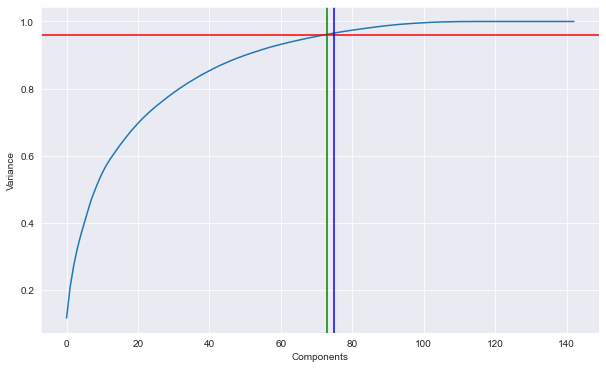

In [201]:
#Scree plot

fig = plt.figure(figsize = (10,6))
sns.set_style('darkgrid')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.96,color = "r")
plt.axvline(75,color = "b")
plt.axvline(73,color = "g")
plt.xlabel("Components")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

In [138]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.59,  20.82,  27.22,  32.27,  36.4 ,  40.07,  43.68,  47.12,
        49.89,  52.5 ,  54.86,  56.89,  58.64,  60.2 ,  61.72,  63.2 ,
        64.59,  65.94,  67.27,  68.48,  69.66,  70.78,  71.83,  72.84,
        73.78,  74.69,  75.55,  76.39,  77.23,  78.04,  78.82,  79.57,
        80.3 ,  81.02,  81.7 ,  82.35,  82.99,  83.61,  84.22,  84.78,
        85.33,  85.88,  86.41,  86.93,  87.4 ,  87.86,  88.32,  88.76,
        89.17,  89.56,  89.94,  90.31,  90.66,  91.01,  91.35,  91.69,
        92.02,  92.33,  92.62,  92.9 ,  93.18,  93.45,  93.71,  93.96,
        94.21,  94.45,  94.69,  94.91,  95.13,  95.35,  95.57,  95.78,
        95.98,  96.18,  96.38,  96.57,  96.75,  96.92,  97.09,  97.26,
        97.42,  97.57,  97.72,  97.87,  98.01,  98.15,  98.29,  98.42,
        98.55,  98.68,  98.8 ,  98.91,  99.02,  99.12,  99.21,  99.3 ,
        99.37,  99.44,  99.51,  99.57,  99.63,  99.69,  99.75,  99.8 ,
        99.83,  99.86,  99.89,  99.91,  99.93,  99.95,  99.97,  99.98,
      

In [139]:
condition = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100) < 96

In [140]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[condition]

array([11.59, 20.82, 27.22, 32.27, 36.4 , 40.07, 43.68, 47.12, 49.89,
       52.5 , 54.86, 56.89, 58.64, 60.2 , 61.72, 63.2 , 64.59, 65.94,
       67.27, 68.48, 69.66, 70.78, 71.83, 72.84, 73.78, 74.69, 75.55,
       76.39, 77.23, 78.04, 78.82, 79.57, 80.3 , 81.02, 81.7 , 82.35,
       82.99, 83.61, 84.22, 84.78, 85.33, 85.88, 86.41, 86.93, 87.4 ,
       87.86, 88.32, 88.76, 89.17, 89.56, 89.94, 90.31, 90.66, 91.01,
       91.35, 91.69, 92.02, 92.33, 92.62, 92.9 , 93.18, 93.45, 93.71,
       93.96, 94.21, 94.45, 94.69, 94.91, 95.13, 95.35, 95.57, 95.78,
       95.98])

In [141]:
len (np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[condition])

73

To achieve 95% accuracy, we would need 73 features.

In [204]:
# Perform PCA using the first 73 components
PCA_final = PCA(n_components = 73, random_state = 42)
transformed_data = PCA_final.fit_transform(X_train)
X_train_PCA = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,74)], index = X_train.index)
data_train_PCA = pd.concat([X_train_PCA, y_train], axis=1)

data_train_PCA.head()

PC_1    PC_2    PC_3     PC_4    PC_5    PC_6    PC_7    PC_8  \
79943  -473.18 -756.95 -426.92  -157.85 -179.66  116.86  205.83   12.22   
39819 -1076.62 -878.10 -695.92   692.52 -206.87 -308.85  285.37  168.18   
48942  1227.38 -904.82 -796.45 -1501.11  191.11  322.16  850.95  448.42   
22240   331.86 -588.47 -464.67  -603.31 -249.71  577.50 -424.33  -78.07   
91709  -850.94 -422.45  771.50   183.68 -121.16 -250.93 -172.18  -55.87   

         PC_9   PC_10  ...  PC_65  PC_66  PC_67  PC_68  PC_69  PC_70  PC_71  \
79943  -51.85  444.49  ...  -2.47  -1.43  -5.49   2.31  -0.15  11.83  -0.77   
39819  -87.85  -89.15  ...  -1.74  12.31  -3.05 -11.81   4.49  -1.84  -1.57   
48942 -197.22 -239.82  ...   0.82 -13.08   4.01 -13.76   8.31  -0.82  21.35   
22240  122.91  124.89  ...  18.81   8.01   5.39 -10.49  -7.33   0.07  -4.32   
91709   -2.90  -59.73  ...  -0.12  -1.58  25.88  -2.53   9.53  -2.58   0.78   

       PC_72  PC_73  churn  
79943  -0.58  -5.91      0  
39819  -7.89  -1.21      1  
48942   9.47 -10.64      0  
22240  -1.02  -2.14      0  
91709  18.55   2.66      0  

[5 rows x 74 columns]

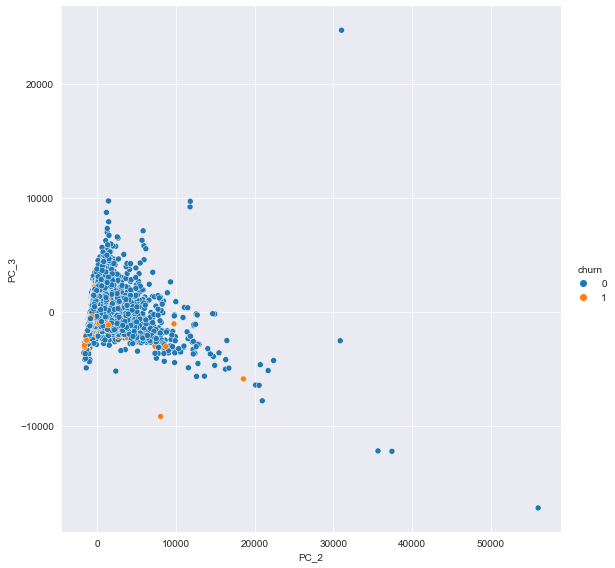

In [207]:
sns.pairplot(data = data_train_PCA, x_vars=["PC_2"], y_vars=["PC_3"], hue = "churn", size=8);

In [142]:
PCA_new = PCA(n_components = 73)

In [143]:
X_train_PCA_new = PCA_new.fit_transform(X_PCA_sm)
X_test_PCA_new = PCA_new.transform(X_test_scaled)
X_train_PCA_new.shape

(36878, 73)

In [144]:
X_test_PCA_new.shape

(8799, 73)

In [146]:
X_train_PCA_new

array([[-2.03396283e+00,  5.61833407e-01,  6.05491127e-01, ...,
         7.04100171e-02,  2.41742540e-01,  6.84368543e-02],
       [-2.69834668e+00, -4.40170874e-01,  1.07506397e+00, ...,
         2.48816978e-01, -1.66782108e-01, -4.40242286e-02],
       [-1.72046543e+00,  3.53210861e+00, -1.63039339e+00, ...,
        -2.56386640e-01,  6.34485441e-02,  3.14991360e-02],
       ...,
       [-3.92483936e+00, -9.86804928e-01, -1.93639192e-01, ...,
         2.14487837e-02,  9.33737471e-02,  1.65621789e-02],
       [-2.75988604e+00, -2.35087728e-01,  2.62705277e-01, ...,
        -4.16153230e-02, -2.44377097e-03, -8.08494014e-02],
       [-2.14724789e+00, -3.24386241e+00, -1.11916071e+00, ...,
        -2.44079679e-01, -3.25125811e-01,  2.41874251e-01]])

In [183]:
X_test_PCA_new

array([[ 4.41879303,  7.97384258, -6.15957238, ..., -0.03920313,
         0.37357452,  0.5102093 ],
       [-1.46884006, -1.16013353,  1.99679633, ..., -0.23103094,
        -0.62824585,  0.22569693],
       [-2.94908272, -0.36679498, -0.02561388, ..., -0.06986494,
         0.22888192,  0.22096504],
       ...,
       [-0.52302877,  0.8690278 ,  2.0681708 , ...,  0.28757008,
         0.09661661, -0.1324842 ],
       [-2.27560587, -1.13409675,  2.69672505, ...,  0.06363686,
        -0.01592735,  0.11445077],
       [ 0.41464832,  0.28018378,  3.25399791, ...,  0.56391696,
         0.59953342, -0.05766628]])

In [148]:
log_reg_new = LogisticRegression() 
log_reg_new.fit(X_train_PCA_new, y_PCA_sm)
y_pred_new = log_reg_new.predict(X_test_PCA_new)

In [149]:
confusion_matrix(y_test, y_pred_new)

array([[6625, 1279],
       [ 146,  749]], dtype=int64)

In [150]:
accuracy_score(y_test, y_pred_new)

0.8380497783839073

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7904
           1       0.38      0.84      0.52       895

    accuracy                           0.85      8799
   macro avg       0.68      0.84      0.72      8799
weighted avg       0.92      0.85      0.87      8799



In [152]:
PCA_column_frame = PCA_df.head(73)

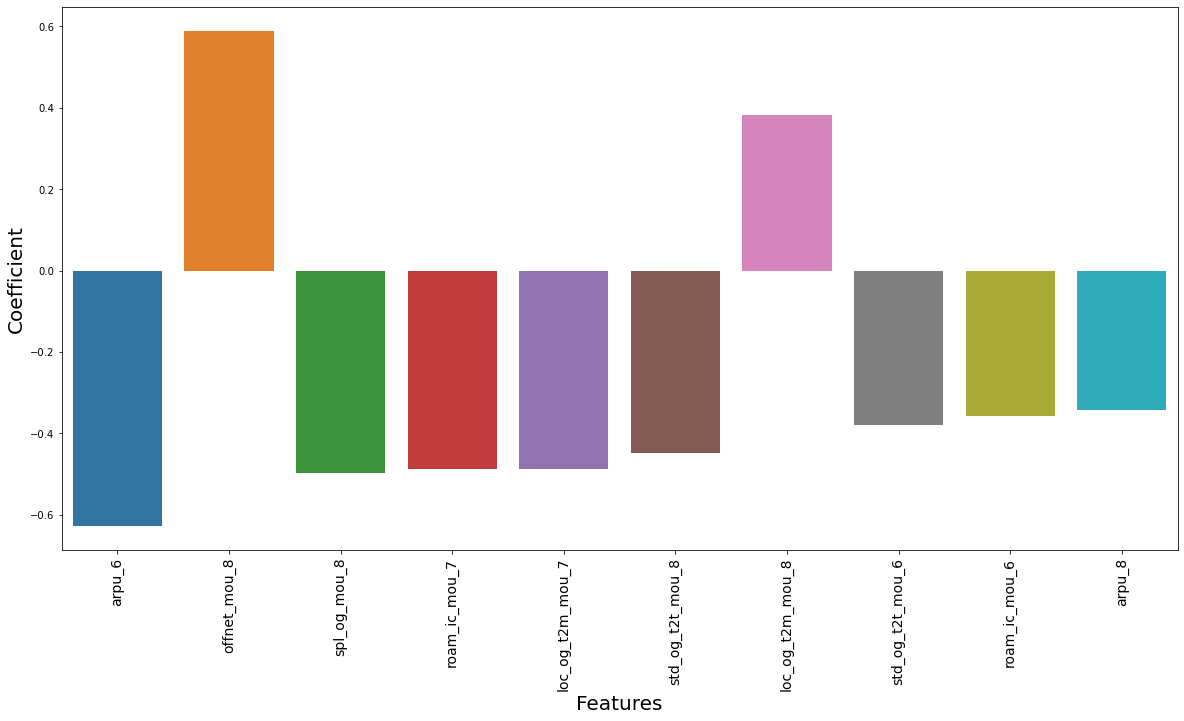

In [153]:
PCA_column_frame["sampling_coeff"] = log_reg_new.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = PCA_column_frame.iloc[(-np.abs(PCA_column_frame["sampling_coeff"].values)).argsort()].head(10)
sns.barplot(x = "Feature", y = "sampling_coeff", data = top_10_features)
plt.xlabel("Features", size = 20)
plt.ylabel("Coefficient", size = 20)
plt.xticks(size = 14, rotation = "vertical")
plt.show()

#### Creating Decision Tree model using PCA Features:

In [154]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_PCA = DecisionTreeClassifier(max_depth = 5)
dec_tree_PCA.fit(X_train_PCA_new, y_PCA_sm)

DecisionTreeClassifier(max_depth=5)

In [155]:
dec_tree_y_predfinal_PCA = dec_tree_PCA.predict(X_test_PCA_new)

In [156]:
print(classification_report(y_test, dec_tree_y_predfinal_PCA))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      7904
           1       0.28      0.79      0.42       895

    accuracy                           0.78      8799
   macro avg       0.63      0.78      0.64      8799
weighted avg       0.90      0.78      0.82      8799



In [157]:
confusion_matrix(y_test, dec_tree_y_predfinal_PCA)

array([[6122, 1782],
       [ 186,  709]], dtype=int64)

In [158]:
accuracy_score(y_test, dec_tree_y_predfinal_PCA)

0.7763382202523014

In [164]:
from sklearn.model_selection import GridSearchCV

nfolds = 3

params_grid = {"max_depth" : range(5, 20, 5),
               "min_samples_leaf" : range(25, 200, 50),
               "min_samples_split" : range(25, 200, 50),
               "criterion" : ["gini", "entropy"]}
dec_tree_grid_PCA = DecisionTreeClassifier()
grid_model_PCA = GridSearchCV(dec_tree_grid_PCA, cv = nfolds, param_grid = params_grid, n_jobs = -1)
grid_model_PCA.fit(X_train_PCA_new, y_PCA_sm) 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(25, 200, 50),
                         'min_samples_split': range(25, 200, 50)})

In [165]:
grid_model_PCA.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [166]:
dec_tree_optimal = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 25, min_samples_split = 25,
                                          criterion='entropy')
dec_tree_optimal.fit(X_train_PCA_new,y_PCA_sm)
y_pred_dec_tree_opt = dec_tree_optimal.predict(X_test_PCA_new)

In [168]:
print(classification_report(y_test, y_pred_dec_tree_opt))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7904
           1       0.33      0.68      0.44       895

    accuracy                           0.83      8799
   macro avg       0.64      0.76      0.67      8799
weighted avg       0.89      0.83      0.85      8799



#### Random Forest model creation using PCA Features:

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf_PCA = RandomForestClassifier()
rf_PCA.fit(X_train_PCA_new, y_PCA_sm)

RandomForestClassifier()

In [170]:
y_pred_rf_PCA = rf_PCA.predict(X_test_PCA_new)

In [171]:
print(classification_report(y_test, y_pred_rf_PCA))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7904
           1       0.52      0.57      0.54       895

    accuracy                           0.90      8799
   macro avg       0.74      0.76      0.74      8799
weighted avg       0.91      0.90      0.90      8799



In [172]:
confusion_matrix(y_test, y_pred_rf_PCA)

array([[7431,  473],
       [ 384,  511]], dtype=int64)

In [173]:
accuracy_score(y_test, y_pred_rf_PCA)

0.9026025684736901

In [174]:
n_folds = 3
params_grid={"max_depth" : range(2, 20, 5),
             "min_samples_leaf" : range(100, 400, 200),
             "min_samples_split" : range(200, 500, 200),
             "n_estimators" : [100, 200, 300], 
             "max_features" : [5, 10]
 }

rf_grid_PCA = RandomForestClassifier()
grid_rf_model_PCA = GridSearchCV(rf_grid_PCA, cv = n_folds, param_grid = params_grid, scoring = "accuracy",
                                 n_jobs = -1, verbose = 1)
grid_rf_model_PCA.fit(X_train_PCA_new, y_PCA_sm)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [175]:
grid_rf_model_PCA.best_params_

{'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [176]:
rf_opt_PCA = RandomForestClassifier(max_depth = 15, max_features = 5, min_samples_leaf = 100, 
                                    min_samples_split = 200, n_estimators = 300)
rf_opt_PCA.fit(X_train_PCA_new, y_PCA_sm)
y_pred_final_rf_opt = rf_opt_PCA.predict(X_test_PCA_new)

In [177]:
rf_opt_PCA.feature_importances_

array([0.14974214, 0.01182477, 0.05859553, 0.02583138, 0.02195484,
       0.00900893, 0.00568005, 0.01423996, 0.12740669, 0.06970683,
       0.08864994, 0.01613948, 0.03231281, 0.00686352, 0.0100091 ,
       0.01190467, 0.01424479, 0.01652695, 0.00827915, 0.01435785,
       0.02220983, 0.00380184, 0.00721865, 0.00380754, 0.00456703,
       0.00692612, 0.00550724, 0.011026  , 0.01611421, 0.00750238,
       0.00425098, 0.0079652 , 0.0058305 , 0.00515109, 0.00243986,
       0.00481509, 0.00263534, 0.00662212, 0.00798243, 0.01167307,
       0.0050538 , 0.0087996 , 0.00608614, 0.00928832, 0.00203322,
       0.00264304, 0.00148134, 0.00957063, 0.0023543 , 0.00450411,
       0.00278723, 0.00311298, 0.00311739, 0.00345332, 0.01338479,
       0.00667389, 0.005917  , 0.0068282 , 0.00302688, 0.00356013,
       0.00551809, 0.00233792, 0.00292663, 0.00170643, 0.00186618,
       0.00156467, 0.0019466 , 0.00256688, 0.00326588, 0.00254091,
       0.00137011, 0.00325671, 0.0041308 ])

In [178]:
PCA_new

PCA(n_components=73)

In [179]:
rf_opt_PCA.feature_importances_

array([0.14974214, 0.01182477, 0.05859553, 0.02583138, 0.02195484,
       0.00900893, 0.00568005, 0.01423996, 0.12740669, 0.06970683,
       0.08864994, 0.01613948, 0.03231281, 0.00686352, 0.0100091 ,
       0.01190467, 0.01424479, 0.01652695, 0.00827915, 0.01435785,
       0.02220983, 0.00380184, 0.00721865, 0.00380754, 0.00456703,
       0.00692612, 0.00550724, 0.011026  , 0.01611421, 0.00750238,
       0.00425098, 0.0079652 , 0.0058305 , 0.00515109, 0.00243986,
       0.00481509, 0.00263534, 0.00662212, 0.00798243, 0.01167307,
       0.0050538 , 0.0087996 , 0.00608614, 0.00928832, 0.00203322,
       0.00264304, 0.00148134, 0.00957063, 0.0023543 , 0.00450411,
       0.00278723, 0.00311298, 0.00311739, 0.00345332, 0.01338479,
       0.00667389, 0.005917  , 0.0068282 , 0.00302688, 0.00356013,
       0.00551809, 0.00233792, 0.00292663, 0.00170643, 0.00186618,
       0.00156467, 0.0019466 , 0.00256688, 0.00326588, 0.00254091,
       0.00137011, 0.00325671, 0.0041308 ])

In [180]:
print(classification_report(y_test, y_pred_final_rf_opt))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7904
           1       0.43      0.71      0.53       895

    accuracy                           0.87      8799
   macro avg       0.70      0.80      0.73      8799
weighted avg       0.91      0.87      0.89      8799



In [181]:
confusion_matrix(y_test, y_pred_final_rf_opt)

array([[7046,  858],
       [ 259,  636]], dtype=int64)

In [182]:
accuracy_score(y_test, y_pred_rf_PCA)

0.9026025684736901

### Conclusions:

EDA

- Customers that have high recharge amount are less likely to churn out.
- Customers who are to churn out can be observed to gradually reduce the recharge amount, the number of times recharge is done.
- Customers that are associated with the network for longer duration are less likely to churn out.
- Customers that churn out have reduced arpu.

Logistic Regression Model:

- Accuracy: 82.55%
- Recall: 85% (0) and 84% (1)
- Inferences:
    - Reduced FB usage in August is an indicator of churn.
    - Reduced Incoming calls on STD and ISD in August month are indicators of churn.

Random Forest:

Accuracy: 92.90%
Recall: 95% (0) and 72% (1)
Top features impacting the result:

total_ic_mou_8

total_og_mou_8

loc_og_t2m_mou_8

roam_og_mou_8

roam_ic_mou_8

loc_ic_t2m_mou_8


total_rech_amt_8

max_rech_amt_8

loc_og_mou_8

offnet_mou_8

loc_ic_mou_8

arpu_8

loc_ic_t2t_mou_8

loc_og_t2t_mou_8

std_ic_mou_8

PCA:

95% accuracy can be achieved using 73 top features.

Logistic Regression Model generated using PCA features:

Accuracy: 83.80%
Recall: 85% (0) and 84% (1)
Impacting Features:

arpu_6

offnet_mou_8

spl_og_mou_8

roam_ic_mou_7

loc_og_t2m_mou_7

std_og_t2t_mou_8

loc_og_t2m_mou_8

std_og_t2t_mopu_6

roam_ic_mou_6

arpu_8

Decision Tree Generated Using PCA features:

Accuracy: 77.63%
Recall: 84% (0) and 68% (1)
Best Parms:
{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

Random Forest Generated Using PCA features:

Accuracy: 90.26%

Recall: 94% (0) and 57% (1)

Best Parms:

{'max_depth': 12,

 'max_features': 10,
 
 'min_samples_leaf': 100,
 
 'min_samples_split': 200,
 
 'n_estimators': 300}